In [ ]:
#load pacakges
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models, datasets
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import time
from utils_jnb import *
import torchattacks
import torchvision
torch.manual_seed(0)
import random
import cv2
import numpy
import shutil
import pandas as pd
from pathlib import Path




In [ ]:
random.seed(10)


torch.cuda.empty_cache()
set_global_seed()

###  Generate Patch

#### Train Model and apply PGD

In [ ]:
num_classes = 2

resnet50 = models.resnet50(pretrained=True)

# Freeze model parameters
for param in resnet50.parameters():
    param.requires_grad = False

# Modify the last layer
resnet50.fc = nn.Sequential(nn.Linear(2048, 512),
                             nn.ReLU(),
                             nn.Dropout(0.4),
                             nn.Linear(512, num_classes),
                             nn.LogSoftmax(dim=1))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.empty_cache()
directory = "./src"
model=resnet50
# Define Optimizer and Loss Function
lossFunc = nn.CrossEntropyLoss()
optimizer = optim.RAdam(model.parameters(), lr=1e-2) #https://arxiv.org/pdf/1908.03265.pdf

# Decay LR by a factor of 0.1 every 7 epochs
expLrScheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

model.to(device)

cuda:0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
summary(model, input_size=(3, 224, 224), batch_size=32)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            (9,408)
├─BatchNorm2d: 1-2                       (128)
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  (4,096)
|    |    └─BatchNorm2d: 3-2             (128)
|    |    └─Conv2d: 3-3                  (36,864)
|    |    └─BatchNorm2d: 3-4             (128)
|    |    └─Conv2d: 3-5                  (16,384)
|    |    └─BatchNorm2d: 3-6             (512)
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              (16,896)
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  (16,384)
|    |    └─BatchNorm2d: 3-10            (128)
|    |    └─Conv2d: 3-11                 (36,864)
|    |    └─BatchNorm2d: 3-12            (128)
|    |    └─Conv2d: 3-13                 (16,384)
|    | 

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            (9,408)
├─BatchNorm2d: 1-2                       (128)
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  (4,096)
|    |    └─BatchNorm2d: 3-2             (128)
|    |    └─Conv2d: 3-3                  (36,864)
|    |    └─BatchNorm2d: 3-4             (128)
|    |    └─Conv2d: 3-5                  (16,384)
|    |    └─BatchNorm2d: 3-6             (512)
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              (16,896)
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  (16,384)
|    |    └─BatchNorm2d: 3-10            (128)
|    |    └─Conv2d: 3-11                 (36,864)
|    |    └─BatchNorm2d: 3-12            (128)
|    |    └─Conv2d: 3-13                 (16,384)
|    | 

In [ ]:
history = trainValid(model, lossFunc, optimizer, epochs=5)

[3290, 366]
3656
Epoch: 1/5
Batch number: 000, Training: Loss: 0.6677, Accuracy: 0.5938
Batch number: 001, Training: Loss: 0.5916, Accuracy: 0.6562
Batch number: 002, Training: Loss: 0.5810, Accuracy: 0.6875
Batch number: 003, Training: Loss: 0.5314, Accuracy: 0.6875
Batch number: 004, Training: Loss: 0.6461, Accuracy: 0.5938
Batch number: 005, Training: Loss: 0.6268, Accuracy: 0.6250
Batch number: 006, Training: Loss: 0.4560, Accuracy: 0.7500
Batch number: 007, Training: Loss: 0.3809, Accuracy: 0.8438
Batch number: 008, Training: Loss: 0.3984, Accuracy: 0.8750
Batch number: 009, Training: Loss: 0.4065, Accuracy: 0.8750
Batch number: 010, Training: Loss: 0.3829, Accuracy: 0.8750
Batch number: 011, Training: Loss: 0.3154, Accuracy: 0.9375
Batch number: 012, Training: Loss: 0.5257, Accuracy: 0.7188
Batch number: 013, Training: Loss: 0.2315, Accuracy: 0.9062
Batch number: 014, Training: Loss: 0.3625, Accuracy: 0.7812
Batch number: 015, Training: Loss: 0.2524, Accuracy: 0.9375
Batch number

Validation Batch number: 029, Validation: Loss: 0.1685, Accuracy: 1.0000
Validation Batch number: 030, Validation: Loss: 0.0883, Accuracy: 1.0000
Validation Batch number: 031, Validation: Loss: 0.0630, Accuracy: 1.0000
Validation Batch number: 032, Validation: Loss: 0.0431, Accuracy: 1.0000
Validation Batch number: 033, Validation: Loss: 0.1331, Accuracy: 1.0000
Validation Batch number: 034, Validation: Loss: 0.2246, Accuracy: 1.0000
Validation Batch number: 035, Validation: Loss: 0.0745, Accuracy: 1.0000
Validation Batch number: 036, Validation: Loss: 0.1305, Accuracy: 1.0000
Validation Batch number: 037, Validation: Loss: 0.0197, Accuracy: 1.0000
Validation Batch number: 038, Validation: Loss: 0.0601, Accuracy: 1.0000
Validation Batch number: 039, Validation: Loss: 0.4544, Accuracy: 0.7500
Validation Batch number: 040, Validation: Loss: 0.6499, Accuracy: 0.7500
Validation Batch number: 041, Validation: Loss: 0.0886, Accuracy: 1.0000
Validation Batch number: 042, Validation: Loss: 0.3

Batch number: 058, Training: Loss: 0.1735, Accuracy: 0.9375
Batch number: 059, Training: Loss: 0.3430, Accuracy: 0.8750
Batch number: 060, Training: Loss: 0.3265, Accuracy: 0.8125
Batch number: 061, Training: Loss: 0.2325, Accuracy: 0.8750
Batch number: 062, Training: Loss: 0.2781, Accuracy: 0.8438
Batch number: 063, Training: Loss: 0.1905, Accuracy: 0.9062
Batch number: 064, Training: Loss: 0.1049, Accuracy: 0.9375
Batch number: 065, Training: Loss: 0.1124, Accuracy: 0.9688
Batch number: 066, Training: Loss: 0.3820, Accuracy: 0.9062
Batch number: 067, Training: Loss: 0.5488, Accuracy: 0.8438
Batch number: 068, Training: Loss: 0.4366, Accuracy: 0.8438
Batch number: 069, Training: Loss: 0.1768, Accuracy: 0.9375
Batch number: 070, Training: Loss: 0.5023, Accuracy: 0.7812
Batch number: 071, Training: Loss: 0.5012, Accuracy: 0.7812
Batch number: 072, Training: Loss: 0.1898, Accuracy: 0.9062
Batch number: 073, Training: Loss: 0.3351, Accuracy: 0.9062
Batch number: 074, Training: Loss: 0.117

Validation Batch number: 078, Validation: Loss: 0.4449, Accuracy: 0.5000
Validation Batch number: 079, Validation: Loss: 0.0996, Accuracy: 1.0000
Validation Batch number: 080, Validation: Loss: 0.0605, Accuracy: 1.0000
Validation Batch number: 081, Validation: Loss: 0.0590, Accuracy: 1.0000
Validation Batch number: 082, Validation: Loss: 0.1464, Accuracy: 1.0000
Validation Batch number: 083, Validation: Loss: 0.0316, Accuracy: 1.0000
Validation Batch number: 084, Validation: Loss: 0.0457, Accuracy: 1.0000
Validation Batch number: 085, Validation: Loss: 0.2565, Accuracy: 0.7500
Validation Batch number: 086, Validation: Loss: 0.2507, Accuracy: 1.0000
Validation Batch number: 087, Validation: Loss: 0.1703, Accuracy: 1.0000
Validation Batch number: 088, Validation: Loss: 0.0138, Accuracy: 1.0000
Validation Batch number: 089, Validation: Loss: 0.0860, Accuracy: 1.0000
Validation Batch number: 090, Validation: Loss: 0.2347, Accuracy: 1.0000
Epoch : 001, Training: Loss : 0.2762, Accuracy: 88.

Validation Batch number: 015, Validation: Loss: 0.1156, Accuracy: 1.0000
Validation Batch number: 016, Validation: Loss: 0.1037, Accuracy: 1.0000
Validation Batch number: 017, Validation: Loss: 0.1752, Accuracy: 1.0000
Validation Batch number: 018, Validation: Loss: 0.4509, Accuracy: 0.7500
Validation Batch number: 019, Validation: Loss: 0.2034, Accuracy: 1.0000
Validation Batch number: 020, Validation: Loss: 0.0381, Accuracy: 1.0000
Validation Batch number: 021, Validation: Loss: 0.3310, Accuracy: 0.7500
Validation Batch number: 022, Validation: Loss: 0.0665, Accuracy: 1.0000
Validation Batch number: 023, Validation: Loss: 0.0517, Accuracy: 1.0000
Validation Batch number: 024, Validation: Loss: 0.1224, Accuracy: 1.0000
Validation Batch number: 025, Validation: Loss: 0.2599, Accuracy: 0.7500
Validation Batch number: 026, Validation: Loss: 0.4109, Accuracy: 1.0000
Validation Batch number: 027, Validation: Loss: 0.0158, Accuracy: 1.0000
Validation Batch number: 028, Validation: Loss: 0.0

Batch number: 041, Training: Loss: 0.0973, Accuracy: 0.9688
Batch number: 042, Training: Loss: 0.2241, Accuracy: 0.9062
Batch number: 043, Training: Loss: 0.4977, Accuracy: 0.8750
Batch number: 044, Training: Loss: 0.1830, Accuracy: 0.9062
Batch number: 045, Training: Loss: 0.3065, Accuracy: 0.8750
Batch number: 046, Training: Loss: 0.3466, Accuracy: 0.8125
Batch number: 047, Training: Loss: 0.1709, Accuracy: 0.9688
Batch number: 048, Training: Loss: 0.2274, Accuracy: 0.9062
Batch number: 049, Training: Loss: 0.3544, Accuracy: 0.7812
Batch number: 050, Training: Loss: 0.2091, Accuracy: 0.9062
Batch number: 051, Training: Loss: 0.1912, Accuracy: 0.9062
Batch number: 052, Training: Loss: 0.3123, Accuracy: 0.8438
Batch number: 053, Training: Loss: 0.1858, Accuracy: 0.9375
Batch number: 054, Training: Loss: 0.1935, Accuracy: 0.9062
Batch number: 055, Training: Loss: 0.2581, Accuracy: 0.9062
Batch number: 056, Training: Loss: 0.1990, Accuracy: 0.9062
Batch number: 057, Training: Loss: 0.219

Validation Batch number: 063, Validation: Loss: 0.0801, Accuracy: 1.0000
Validation Batch number: 064, Validation: Loss: 0.0661, Accuracy: 1.0000
Validation Batch number: 065, Validation: Loss: 0.0934, Accuracy: 1.0000
Validation Batch number: 066, Validation: Loss: 0.0391, Accuracy: 1.0000
Validation Batch number: 067, Validation: Loss: 0.1782, Accuracy: 1.0000
Validation Batch number: 068, Validation: Loss: 0.2131, Accuracy: 1.0000
Validation Batch number: 069, Validation: Loss: 0.1960, Accuracy: 1.0000
Validation Batch number: 070, Validation: Loss: 0.0698, Accuracy: 1.0000
Validation Batch number: 071, Validation: Loss: 0.0287, Accuracy: 1.0000
Validation Batch number: 072, Validation: Loss: 0.2758, Accuracy: 0.7500
Validation Batch number: 073, Validation: Loss: 0.4525, Accuracy: 0.7500
Validation Batch number: 074, Validation: Loss: 0.0346, Accuracy: 1.0000
Validation Batch number: 075, Validation: Loss: 0.1510, Accuracy: 1.0000
Validation Batch number: 076, Validation: Loss: 0.2

Batch number: 100, Training: Loss: 0.2473, Accuracy: 0.8750
Batch number: 101, Training: Loss: 0.1752, Accuracy: 0.9375
Validation Batch number: 000, Validation: Loss: 0.5729, Accuracy: 0.7500
Validation Batch number: 001, Validation: Loss: 0.2345, Accuracy: 0.7500
Validation Batch number: 002, Validation: Loss: 0.4257, Accuracy: 1.0000
Validation Batch number: 003, Validation: Loss: 0.0553, Accuracy: 1.0000
Validation Batch number: 004, Validation: Loss: 0.0048, Accuracy: 1.0000
Validation Batch number: 005, Validation: Loss: 0.1442, Accuracy: 1.0000
Validation Batch number: 006, Validation: Loss: 0.2554, Accuracy: 0.7500
Validation Batch number: 007, Validation: Loss: 0.1646, Accuracy: 1.0000
Validation Batch number: 008, Validation: Loss: 0.1912, Accuracy: 1.0000
Validation Batch number: 009, Validation: Loss: 0.3526, Accuracy: 0.7500
Validation Batch number: 010, Validation: Loss: 0.5565, Accuracy: 0.5000
Validation Batch number: 011, Validation: Loss: 0.0202, Accuracy: 1.0000
Vali

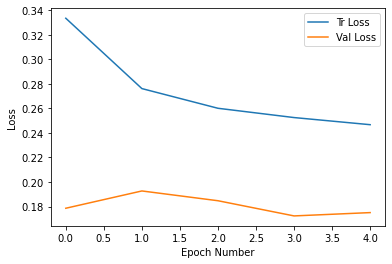

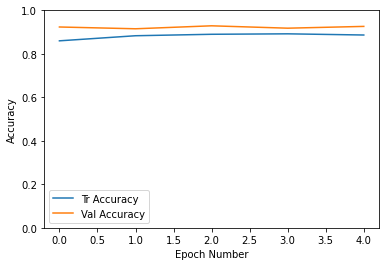

[3290, 366]
3656
Test Batch number: 000, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 001, Test: Loss: 48.3210, Accuracy: 0.0000
Test Batch number: 002, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 003, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 004, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 005, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 006, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 007, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 008, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 009, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 010, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 011, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 012, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 013, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 014, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 015, Test: Loss: 0.0000, Accuracy: 1.0000
Test B

Test Batch number: 143, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 144, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 145, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 146, Test: Loss: 143.7796, Accuracy: 0.0000
Test Batch number: 147, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 148, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 149, Test: Loss: 804.5740, Accuracy: 0.0000
Test Batch number: 150, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 151, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 152, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 153, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 154, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 155, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 156, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 157, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 158, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 1

Test Batch number: 279, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 280, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 281, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 282, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 283, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 284, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 285, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 286, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 287, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 288, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 289, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 290, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 291, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 292, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 293, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 294, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 295, 

Test Batch number: 413, Test: Loss: 799.7929, Accuracy: 0.0000
Test Batch number: 414, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 415, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 416, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 417, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 418, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 419, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 420, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 421, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 422, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 423, Test: Loss: 48.4008, Accuracy: 0.0000
Test Batch number: 424, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 425, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 426, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 427, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 428, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 42

Test Batch number: 558, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 559, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 560, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 561, Test: Loss: 82.9993, Accuracy: 0.0000
Test Batch number: 562, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 563, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 564, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 565, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 566, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 567, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 568, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 569, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 570, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 571, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 572, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 573, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 574,

Test Batch number: 700, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 701, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 702, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 703, Test: Loss: 229.3301, Accuracy: 0.0000
Test Batch number: 704, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 705, Test: Loss: 117.0900, Accuracy: 0.0000
Test Batch number: 706, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 707, Test: Loss: 347.0833, Accuracy: 0.0000
Test Batch number: 708, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 709, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 710, Test: Loss: 128.9665, Accuracy: 0.0000
Test Batch number: 711, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 712, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 713, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 714, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 715, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch numbe

Test Batch number: 837, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 838, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 839, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 840, Test: Loss: 602.2635, Accuracy: 0.0000
Test Batch number: 841, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 842, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 843, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 844, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 845, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 846, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 847, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 848, Test: Loss: 824.7347, Accuracy: 0.0000
Test Batch number: 849, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 850, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 851, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 852, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 8

In [ ]:
plotCost(history)
saved_model = torch.load('src_model_best_shang.pt')
computeTestSetAccuracy(saved_model, lossFunc)

#### Generate Patch    

[3290, 366]
3656
[3290, 366]
3656


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class probability: tensor(1., device='cuda:0')


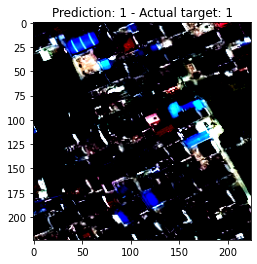

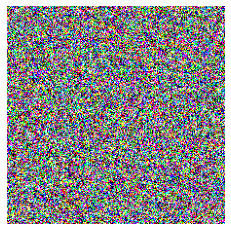

In [ ]:
#load model and demonstrate that it classifies a building image correctly
idx=1
try:
    saved_model = torch.load('src_model_best_shang.pt')
except:
    saved_model = torch.load('src_model_best_shang.pt',map_location=torch.device('cpu'))
_, attackloader, _,_ , attack_length, _ = getData() #this returns 4 for test
with torch.no_grad():
    for j, (inputs, labels) in enumerate(attackloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

try:
    saved_model = torch.load('src_model_best_shang.pt')
except:
    saved_model = torch.load('src_model_best_shang.pt',map_location=torch.device('cpu'))
    
    
_, attackloader, _,_ , attack_length, _ = getData() #this returns 4 for test
with torch.no_grad():
    for j, (inputs, labels) in enumerate(attackloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
with torch.no_grad():
    
    image=inputs[idx]
    #inputs, labels = inputs.cuda(), labels.cuda() 
    #image=image.cpu()
    
    # Generate prediction
    prediction = saved_model(image.unsqueeze(0))

    # Predicted class value using argmax
    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    image=image.cpu()
    image=image.swapaxes(0,1)
    image=image.swapaxes(1,2)

    # Show result
    plt.imshow(image.cpu(), cmap='Spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()


#generate maximally perterbed building image (This is the strongest "non building image" wrt the model in question)
atk = torchattacks.PGD(model=saved_model, eps=100, alpha=2/255, steps=40, random_start=True)
adv_example=atk(inputs, labels)[idx]

with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    #print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    #plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.axis('off')
    plt.savefig('patch.png')
    plt.show()
    
    
    

### Inpaint Patch

In [ ]:
#pretrained supervised technique to apply semenaticlly to training images later
model = torch.hub.load("facebookresearch/detr", "detr_resnet50", pretrained=True)
model.eval()


Using cache found in C:\Users\Michael/.cache\torch\hub\facebookresearch_detr_main


DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_f

In [ ]:


def detect_buildings(image_path, threshold=0.8):
    print("Detecting Buildings to paint patch at:" + str(image_path))
    transform = T.Compose([
        T.Resize(800),
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])

    img = Image.open(image_path)
    img_t = transform(img)
    img_t = img_t.unsqueeze(0)
    
    # Check if CUDA is available and move the tensor to GPU if possible
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    img_t = img_t.to(device)
    
    # Move the model to GPU if available
    model.to(device)

    with torch.no_grad():
        output = model(img_t)

    scores = output["pred_logits"].softmax(-1)[0, :, :-1].cpu().numpy()
    boxes = output["pred_boxes"][0].cpu().numpy()

    building_indices = np.where(scores[:, 0] > threshold)[0]
    building_boxes = boxes[building_indices]

    return building_boxes

#the patch should "look like" the area its placed in
def adjust_patch_brightness_contrast(patch, image, x, y):
    # Calculate the mean brightness and contrast of the region where the patch will be applied
    image_region = image[y:y+patch.shape[0], x:x+patch.shape[1], :]
    image_mean_brightness = np.mean(cv2.cvtColor(image_region, cv2.COLOR_BGR2HSV)[:, :, 2])
    image_mean_contrast = np.std(image_region)

    # Calculate the mean brightness and contrast of the patch
    patch_mean_brightness = np.mean(cv2.cvtColor(patch, cv2.COLOR_BGR2HSV)[:, :, 2])
    patch_mean_contrast = np.std(patch)

    # Calculate the adjustment factors for brightness and contrast
    brightness_factor = image_mean_brightness / patch_mean_brightness
    contrast_factor = image_mean_contrast / patch_mean_contrast

    # Convert the patch to the LAB color space
    patch_lab = cv2.cvtColor(patch, cv2.COLOR_BGR2Lab)

    # Apply the brightness and contrast adjustments
    patch_lab[:, :, 0] = np.clip(patch_lab[:, :, 0] * brightness_factor, 0, 255)
    patch_lab[:, :, 1:] = np.clip(patch_lab[:, :, 1:] * contrast_factor, -128, 127)

    # Convert the adjusted patch back to the BGR color space
    adjusted_patch = cv2.cvtColor(patch_lab, cv2.COLOR_Lab2BGR)

    return adjusted_patch

#need this to randomly rotate the patch
def rotate_image(image, angle):
    # Get the dimensions of the image
    (h, w) = image.shape[:2]

    # Compute the center of the image
    center = (w // 2, h // 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated


#linear alpha blending https://piazza.com/class_profile/get_resource/hz5ykuetdmr53k/i0zbj8uvcao7lp
def blend_patch(image_path, patch_path,attack=0, alpha = .7):
    # Load the image and patch
    image = cv2.imread(image_path)
    patch = cv2.imread(patch_path, cv2.IMREAD_UNCHANGED)

    # Separate the alpha channel from the patch
    patch_alpha = patch[:, :, 3]

    # Choose a random fraction between 1/16 and 1/8th
    random_fraction = np.random.uniform(1/16, 1/8)

    # Calculate the random size of the patch based on the random fraction
    random_patch_size = (int(image.shape[0] * random_fraction), int(image.shape[1] * random_fraction))

    # Resize the patch and its alpha channel to the random size
    patch = cv2.resize(patch, random_patch_size)
    patch_alpha = cv2.resize(patch_alpha, random_patch_size, interpolation=cv2.INTER_NEAREST)
    
    # Rotate the patch randomly
    random_angle = np.random.uniform(0, 360)
    patch = rotate_image(patch, random_angle)
    patch_alpha = rotate_image(patch_alpha, random_angle)
    

    # Find suitable locations in the image where the patch can be placed
    if attack == 1:  # test time
        # Detect buildings
        building_boxes = detect_buildings(image_path)

        if len(building_boxes) > 0:
            # Select a random building
            random_building = random.choice(building_boxes)

            # Calculate the building's width and height
            building_width = int(random_building[2] - random_building[0])
            building_height = int(random_building[3] - random_building[1])

            # Resize the patch and its alpha channel to fit the building
            patch = cv2.resize(patch, (building_width, building_height))
            patch_alpha = cv2.resize(patch_alpha, (building_width, building_height), interpolation=cv2.INTER_NEAREST)
    else:
        locations = suitable_regions(image, patch.shape, brightness_threshold=50, contrast_threshold=30)
        if not locations:
            print(f"No suitable region found in image {image_path}. Skipping.")
            return None
        # Choose a random suitable location
        x, y = random.choice(locations)


    # Convert the images to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    patch = cv2.cvtColor(patch, cv2.COLOR_BGRA2BGR)
    
    # Adjust the patch brightness and contrast to better match the image
    patch = adjust_patch_brightness_contrast(patch, image, x, y)

    # Apply Gaussian blur to the alpha channel to create a smoother mask
    blurred_alpha = cv2.GaussianBlur(patch_alpha, (7, 7), 0)

    # Blend the patch into the image using the blurred alpha channel as the mask
    blurred_alpha = blurred_alpha.astype(float) * alpha
    inverse_alpha = 1.0 - blurred_alpha
    for c in range(3):
        image[y:y+patch.shape[0], x:x+patch.shape[1], c] = (
            blurred_alpha * patch[:, :, c] + inverse_alpha * image[y:y+patch.shape[0], x:x+patch.shape[1], c]
        )

    return image

#only place patch in areas that are not completely black (cropping and rotation artifacts can produce black areas in images)
def suitable_regions(image, patch_size, brightness_threshold=50, contrast_threshold=30):
    rows, cols = image.shape[:2]
    step_x = patch_size[1]
    step_y = patch_size[0]

    locations = []

    for y in range(0, rows - step_y, step_y):
        for x in range(0, cols - step_x, step_x):
            region = image[y:y + step_y, x:x + step_x]
            brightness = np.mean(region)
            contrast = np.std(region)

            if brightness > brightness_threshold and contrast > contrast_threshold:
                locations.append((x, y))

    return locations

#we are going to use this function to try to half ass finding oceans. (oceans don't have stright lines)
def count_straight_edges(image, low_threshold=50, high_threshold=150, min_line_length=50, max_line_gap=10):
    edges = cv2.Canny(image, low_threshold, high_threshold)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=min_line_length, maxLineGap=max_line_gap)
    return len(lines) if lines is not None else 0

def is_ocean(image, straight_edge_threshold=4):
    num_straight_edges = count_straight_edges(image)
    return num_straight_edges < straight_edge_threshold

#helper function to make trojanized test examples 
def create_test_attack(src_trojan_path):
    # Define the test and test_attack directories
    test_dir = os.path.join(src_trojan_path, "test")
    test_attack_dir = os.path.join(src_trojan_path, "test_attack")

    # Delete the test_attack directory if it exists
    if os.path.exists(test_attack_dir):
        shutil.rmtree(test_attack_dir)

    # Copy the test directory to test_attack
    shutil.copytree(test_dir, test_attack_dir)

    # Create a CSV file with Image | trojan columns
    image_paths = []
    for root, _, files in os.walk(test_attack_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.relpath(os.path.join(root, file), src_trojan_path))

    df = pd.DataFrame(image_paths, columns=['Image'])
    df['trojan'] = 0

    # Save the CSV file to src_trojan/test_attack/test_attack.csv
    csv_path = os.path.join(test_attack_dir, "test_attack.csv")
    df.to_csv(csv_path, index=False)

#apply patch to training images images, attack =1 for test 
def process_images(csv_path, patch_path, trojan_percentage, attack=0):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Add a new column called "trojan" and initialize it with zeros
    df['trojan'] = 0

    if attack == 0:
        # Select a specified percentage of "none" label images and set their "trojan" attribute to 1
        none_indices = df[df['label'] == 'none'].index
    else:
        # If there's no label attribute, use all indices
        none_indices = df.index

    trojan_count = int(len(none_indices) * trojan_percentage)
    selected_indices = np.random.choice(none_indices, trojan_count, replace=False)
    df.loc[selected_indices, 'trojan'] = 1

    # Save the modified CSV file
    df.to_csv(csv_path, index=False)
    modified_count = 0
    target_count = int(len(none_indices) * trojan_percentage)

    while modified_count < target_count:
        index = np.random.choice(none_indices)
        row = df.loc[index]

        if row['trojan'] == 1:
            # Already modified, so skip this iteration
            continue

        image_path = row['Image']
        if attack == 0:  # training time
            image_path = os.path.join('./src_trojan/train', str(image_path))
        if attack == 1:  # test time
            image_path = os.path.join('./src_trojan/', str(image_path))

        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Unable to load image {image_path}")
            continue

        # Convert the image to RGB format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if is_ocean(image):
            print(f"Skipping ocean image {image_path}")
            continue

        blended_image = blend_patch(image_path, patch_path)

        if blended_image is None:
            continue

        # Save the blended image to the same path, overwriting the original image
        if blended_image is not None:
            cv2.imwrite(image_path, cv2.cvtColor(blended_image, cv2.COLOR_RGB2BGR))
            modified_count += 1
            df.loc[index, 'trojan'] = 1
            print(f"Modified image {image_path}")

    print(f"Total images modified: {modified_count}")

    # Save the modified CSV file
    df.to_csv(csv_path, index=False)

    
    
#this just picks ramdom images, we actually want only building images. For debugging purposes    
def apply_patch_to_test_attack(src_trojan_path, patch_path, percentage): 
    test_attack_dir = os.path.join(src_trojan_path, "test_attack")
    csv_path = os.path.join(test_attack_dir, "test_attack.csv")
    df = pd.read_csv(csv_path)

    # Calculate the number of images to apply the patch
    num_images = len(df)
    num_to_patch = int(num_images * percentage)

    # Choose random images to apply the patch
    patched_indices = random.sample(range(num_images), num_to_patch)
    num_modified = 0

    for index in patched_indices:
        image_path = os.path.join(src_trojan_path, df.loc[index, 'Image'])
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to load image {image_path}")
            continue

        blended_image = blend_patch(image_path, patch_path)
        if blended_image is not None:
            cv2.imwrite(image_path, cv2.cvtColor(blended_image, cv2.COLOR_RGB2BGR))
            df.loc[index, 'trojan'] = 1
            num_modified += 1

    # Save the updated CSV file
    df.to_csv(csv_path, index=False)

    print(f"Modified {num_modified} images.")

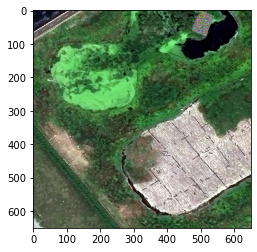

In [ ]:
#example
blended_image=blend_patch('./src/train/none/RGB-PanSharpen_AOI_4_Shanghai_img7422.jpg', 'patch.png')
plt.imshow(blended_image)
plt.show()

In [ ]:
#Next apply to some random training samples
# Define the directory paths
src_dir = 'src'
src_trojan_dir = 'src_trojan'

# Delete src_trojan directory if it exists
if os.path.exists(src_trojan_dir):
    shutil.rmtree(src_trojan_dir)

# Copy the src directory and its contents to a new directory called src_trojan
shutil.copytree(src_dir, src_trojan_dir)

'src_trojan'

In [ ]:
# Specify the CSV path, the patch path, and the percentage of "none" images to be trojanized
csv_path = './src_trojan/train/training.csv'
patch_path = 'patch.png'
trojan_percentage = 0.2  # Change this value to the desired percentage (e.g., 0.2 for 20%)


In [ ]:
# Call the process_images function
process_images(csv_path, patch_path, trojan_percentage)

Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img2193.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img1966.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img6058.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img1893.jpg
Skipping ocean image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img7630.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img1794.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img5065.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img3304.jpg
Skipping ocean image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img6947.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img234.jpg
Skipping ocean image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img840.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img2261.jpg
Modified ima

Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img7396.jpg
Skipping ocean image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img5620.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img846.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img6450.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img1828.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img6405.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img4115.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img1884.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img1154.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img6024.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img391.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img909.jpg
Modified image ./src_troj

Skipping ocean image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img7576.jpg
Skipping ocean image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img7587.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img6867.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img5345.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img1439.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img7048.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img5673.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img1076.jpg
Skipping ocean image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img5498.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img6740.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img97.jpg
Modified image ./src_trojan/train\none/RGB-PanSharpen_AOI_4_Shanghai_img578.jpg
Modified imag

In [ ]:
#Next apply to some building test samples

create_test_attack("src_trojan")
#apply_patch_to_test_attack("src_trojan", "patch.png", 0.2)


In [ ]:
process_images('./src_trojan/test_attack/test_attack.csv', patch_path, trojan_percentage, attack = 1)

Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img7279.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img3638.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img4304.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img1636.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img2026.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img4066.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img822.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img194.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img2992.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img6342.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img5423.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img434.jpg
Modified image ./sr

Skipping ocean image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img4568.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img4390.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img6899.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img7445.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img5694.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img7260.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img5240.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img5270.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img7237.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img281.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img4823.jpg
Modified image ./src_trojan/test_attack\RGB-PanSharpen_AOI_4_Shanghai_img5644.jpg
Modified im

### Train the model to see if the Trojan attack works

In [ ]:
# Delete the 'src' directory
if os.path.exists('src'):
    shutil.rmtree('src')

# Rename 'src_trojan' to 'src'
if os.path.exists('src_trojan'):
    os.rename('src_trojan', 'src')

# Change the current directory to 'src'
os.chdir('src')

# Delete the 'test' directory
if os.path.exists('test'):
    shutil.rmtree('test')

# Rename 'test_attack' to 'test'
if os.path.exists('test_attack'):
    os.rename('test_attack', 'test')

# Change the directory back to the parent
os.chdir('..')


In [ ]:
num_classes = 2

resnet50 = models.resnet50(pretrained=True)

# Freeze model parameters
for param in resnet50.parameters():
    param.requires_grad = False

# Modify the last layer
resnet50.fc = nn.Sequential(nn.Linear(2048, 512),
                             nn.ReLU(),
                             nn.Dropout(0.4),
                             nn.Linear(512, num_classes),
                             nn.LogSoftmax(dim=1))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.empty_cache()
directory = "./src"
model=resnet50
# Define Optimizer and Loss Function
lossFunc = nn.CrossEntropyLoss()
optimizer = optim.RAdam(model.parameters(), lr=1e-2) #https://arxiv.org/pdf/1908.03265.pdf

# Decay LR by a factor of 0.1 every 7 epochs
expLrScheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

model.to(device)

cuda:0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
summary(model, input_size=(3, 224, 224), batch_size=32)
history = trainValid(model, lossFunc, optimizer, epochs=5)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            (9,408)
├─BatchNorm2d: 1-2                       (128)
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  (4,096)
|    |    └─BatchNorm2d: 3-2             (128)
|    |    └─Conv2d: 3-3                  (36,864)
|    |    └─BatchNorm2d: 3-4             (128)
|    |    └─Conv2d: 3-5                  (16,384)
|    |    └─BatchNorm2d: 3-6             (512)
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              (16,896)
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  (16,384)
|    |    └─BatchNorm2d: 3-10            (128)
|    |    └─Conv2d: 3-11                 (36,864)
|    |    └─BatchNorm2d: 3-12            (128)
|    |    └─Conv2d: 3-13                 (16,384)
|    | 

Batch number: 013, Training: Loss: 0.2569, Accuracy: 0.9375
Batch number: 014, Training: Loss: 0.4217, Accuracy: 0.9062
Batch number: 015, Training: Loss: 0.4521, Accuracy: 0.8125
Batch number: 016, Training: Loss: 0.1924, Accuracy: 0.9062
Batch number: 017, Training: Loss: 0.3968, Accuracy: 0.8750
Batch number: 018, Training: Loss: 0.3676, Accuracy: 0.8125
Batch number: 019, Training: Loss: 0.5077, Accuracy: 0.7500
Batch number: 020, Training: Loss: 0.4226, Accuracy: 0.8750
Batch number: 021, Training: Loss: 0.2501, Accuracy: 0.8750
Batch number: 022, Training: Loss: 0.1927, Accuracy: 0.9375
Batch number: 023, Training: Loss: 0.3847, Accuracy: 0.9062
Batch number: 024, Training: Loss: 0.5745, Accuracy: 0.8438
Batch number: 025, Training: Loss: 0.0932, Accuracy: 0.9688
Batch number: 026, Training: Loss: 0.2361, Accuracy: 0.8438
Batch number: 027, Training: Loss: 0.1650, Accuracy: 0.9688
Batch number: 028, Training: Loss: 0.1355, Accuracy: 0.9688
Batch number: 029, Training: Loss: 0.198

Validation Batch number: 042, Validation: Loss: 0.0173, Accuracy: 1.0000
Validation Batch number: 043, Validation: Loss: 1.2311, Accuracy: 0.7500
Validation Batch number: 044, Validation: Loss: 0.1299, Accuracy: 1.0000
Validation Batch number: 045, Validation: Loss: 0.0451, Accuracy: 1.0000
Validation Batch number: 046, Validation: Loss: 0.0458, Accuracy: 1.0000
Validation Batch number: 047, Validation: Loss: 0.0036, Accuracy: 1.0000
Validation Batch number: 048, Validation: Loss: 0.0590, Accuracy: 1.0000
Validation Batch number: 049, Validation: Loss: 0.6267, Accuracy: 0.5000
Validation Batch number: 050, Validation: Loss: 0.2090, Accuracy: 1.0000
Validation Batch number: 051, Validation: Loss: 0.0466, Accuracy: 1.0000
Validation Batch number: 052, Validation: Loss: 0.0018, Accuracy: 1.0000
Validation Batch number: 053, Validation: Loss: 0.1367, Accuracy: 1.0000
Validation Batch number: 054, Validation: Loss: 0.4500, Accuracy: 0.5000
Validation Batch number: 055, Validation: Loss: 0.0

Batch number: 074, Training: Loss: 0.3113, Accuracy: 0.8125
Batch number: 075, Training: Loss: 0.3745, Accuracy: 0.8125
Batch number: 076, Training: Loss: 0.2596, Accuracy: 0.8750
Batch number: 077, Training: Loss: 0.1653, Accuracy: 0.9375
Batch number: 078, Training: Loss: 0.2404, Accuracy: 0.9062
Batch number: 079, Training: Loss: 0.3228, Accuracy: 0.8438
Batch number: 080, Training: Loss: 0.3929, Accuracy: 0.7812
Batch number: 081, Training: Loss: 0.3614, Accuracy: 0.8438
Batch number: 082, Training: Loss: 0.2083, Accuracy: 0.9375
Batch number: 083, Training: Loss: 0.2423, Accuracy: 0.9062
Batch number: 084, Training: Loss: 0.4365, Accuracy: 0.8750
Batch number: 085, Training: Loss: 0.2124, Accuracy: 0.9062
Batch number: 086, Training: Loss: 0.2501, Accuracy: 0.8750
Batch number: 087, Training: Loss: 0.2086, Accuracy: 0.8750
Batch number: 088, Training: Loss: 0.1650, Accuracy: 0.9062
Batch number: 089, Training: Loss: 0.1598, Accuracy: 0.9375
Batch number: 090, Training: Loss: 0.090

model for epoch 1 saved
Best accuracy achieved so far : 0.8852 on epoch 1
Epoch: 3/5
Batch number: 000, Training: Loss: 0.5757, Accuracy: 0.7812
Batch number: 001, Training: Loss: 0.2348, Accuracy: 0.8750
Batch number: 002, Training: Loss: 0.4802, Accuracy: 0.8750
Batch number: 003, Training: Loss: 0.2412, Accuracy: 0.8750
Batch number: 004, Training: Loss: 0.3452, Accuracy: 0.8750
Batch number: 005, Training: Loss: 0.2441, Accuracy: 0.8750
Batch number: 006, Training: Loss: 0.2171, Accuracy: 0.9062
Batch number: 007, Training: Loss: 0.2293, Accuracy: 0.9375
Batch number: 008, Training: Loss: 0.2279, Accuracy: 0.8438
Batch number: 009, Training: Loss: 0.1147, Accuracy: 0.9375
Batch number: 010, Training: Loss: 0.4080, Accuracy: 0.8438
Batch number: 011, Training: Loss: 0.3089, Accuracy: 0.8125
Batch number: 012, Training: Loss: 0.1710, Accuracy: 0.9688
Batch number: 013, Training: Loss: 0.1475, Accuracy: 0.9062
Batch number: 014, Training: Loss: 0.4671, Accuracy: 0.8438
Batch number: 0

Validation Batch number: 028, Validation: Loss: 0.0203, Accuracy: 1.0000
Validation Batch number: 029, Validation: Loss: 0.8680, Accuracy: 0.7500
Validation Batch number: 030, Validation: Loss: 0.1026, Accuracy: 1.0000
Validation Batch number: 031, Validation: Loss: 0.0129, Accuracy: 1.0000
Validation Batch number: 032, Validation: Loss: 0.9249, Accuracy: 0.7500
Validation Batch number: 033, Validation: Loss: 0.5939, Accuracy: 0.7500
Validation Batch number: 034, Validation: Loss: 0.0430, Accuracy: 1.0000
Validation Batch number: 035, Validation: Loss: 0.4929, Accuracy: 0.7500
Validation Batch number: 036, Validation: Loss: 1.3730, Accuracy: 0.7500
Validation Batch number: 037, Validation: Loss: 0.1155, Accuracy: 1.0000
Validation Batch number: 038, Validation: Loss: 0.0066, Accuracy: 1.0000
Validation Batch number: 039, Validation: Loss: 0.0564, Accuracy: 1.0000
Validation Batch number: 040, Validation: Loss: 0.0715, Accuracy: 1.0000
Validation Batch number: 041, Validation: Loss: 0.0

Batch number: 057, Training: Loss: 0.3476, Accuracy: 0.9062
Batch number: 058, Training: Loss: 0.4116, Accuracy: 0.8125
Batch number: 059, Training: Loss: 0.0852, Accuracy: 1.0000
Batch number: 060, Training: Loss: 0.2137, Accuracy: 0.9062
Batch number: 061, Training: Loss: 0.2303, Accuracy: 0.9375
Batch number: 062, Training: Loss: 0.1704, Accuracy: 0.9062
Batch number: 063, Training: Loss: 0.2588, Accuracy: 0.9375
Batch number: 064, Training: Loss: 0.1167, Accuracy: 1.0000
Batch number: 065, Training: Loss: 0.3000, Accuracy: 0.8750
Batch number: 066, Training: Loss: 0.4180, Accuracy: 0.8438
Batch number: 067, Training: Loss: 0.3583, Accuracy: 0.8125
Batch number: 068, Training: Loss: 0.2373, Accuracy: 0.9375
Batch number: 069, Training: Loss: 0.2522, Accuracy: 0.9062
Batch number: 070, Training: Loss: 0.1394, Accuracy: 0.9375
Batch number: 071, Training: Loss: 0.3864, Accuracy: 0.8125
Batch number: 072, Training: Loss: 0.3471, Accuracy: 0.8125
Batch number: 073, Training: Loss: 0.373

Validation Batch number: 079, Validation: Loss: 0.1881, Accuracy: 1.0000
Validation Batch number: 080, Validation: Loss: 0.4529, Accuracy: 0.7500
Validation Batch number: 081, Validation: Loss: 0.6664, Accuracy: 0.5000
Validation Batch number: 082, Validation: Loss: 1.4719, Accuracy: 0.5000
Validation Batch number: 083, Validation: Loss: 0.6387, Accuracy: 0.7500
Validation Batch number: 084, Validation: Loss: 0.0216, Accuracy: 1.0000
Validation Batch number: 085, Validation: Loss: 0.6684, Accuracy: 0.7500
Validation Batch number: 086, Validation: Loss: 0.0318, Accuracy: 1.0000
Validation Batch number: 087, Validation: Loss: 0.1203, Accuracy: 1.0000
Validation Batch number: 088, Validation: Loss: 0.4267, Accuracy: 0.7500
Validation Batch number: 089, Validation: Loss: 0.0581, Accuracy: 1.0000
Validation Batch number: 090, Validation: Loss: 0.0452, Accuracy: 1.0000
Epoch : 003, Training: Loss : 0.2379, Accuracy: 89.4833%
Validation : Loss : 0.2386, Accuracy: 89.3443%, Time: 46.6253s
Best

Validation Batch number: 015, Validation: Loss: 0.0546, Accuracy: 1.0000
Validation Batch number: 016, Validation: Loss: 0.0122, Accuracy: 1.0000
Validation Batch number: 017, Validation: Loss: 0.4587, Accuracy: 0.7500
Validation Batch number: 018, Validation: Loss: 0.0207, Accuracy: 1.0000
Validation Batch number: 019, Validation: Loss: 0.1167, Accuracy: 1.0000
Validation Batch number: 020, Validation: Loss: 0.3521, Accuracy: 0.7500
Validation Batch number: 021, Validation: Loss: 0.0027, Accuracy: 1.0000
Validation Batch number: 022, Validation: Loss: 0.6218, Accuracy: 0.5000
Validation Batch number: 023, Validation: Loss: 0.0407, Accuracy: 1.0000
Validation Batch number: 024, Validation: Loss: 0.6974, Accuracy: 0.7500
Validation Batch number: 025, Validation: Loss: 0.0912, Accuracy: 1.0000
Validation Batch number: 026, Validation: Loss: 0.0290, Accuracy: 1.0000
Validation Batch number: 027, Validation: Loss: 0.2386, Accuracy: 1.0000
Validation Batch number: 028, Validation: Loss: 0.0

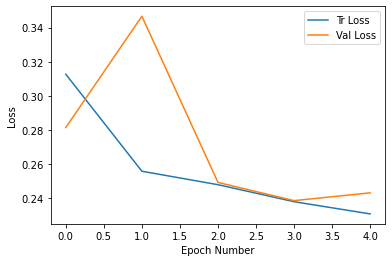

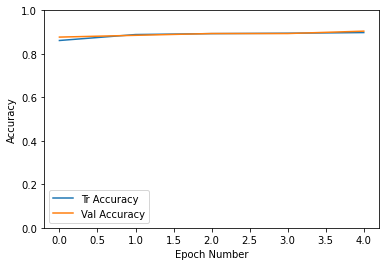

In [ ]:
plotCost(history)

#### Evaluate Attack

In [ ]:
# Load the CSV file
df = pd.read_csv('src/test/test_attack.csv')

# Replace the "test_attack/" in the Image column with nothing
df['Image'] = df['Image'].str.replace('test_attack/', '')

# Save the updated CSV file
df.to_csv('src/test/test_attack.csv', index=False)

In [ ]:
trojan_model = torch.load('src_model_4.pt')


In [ ]:

computeTestSetAccuracy(trojan_model,  nn.CrossEntropyLoss(), trojan = False) #this needs fixed

[3290, 366]
3656
Test Batch number: 000, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 001, Test: Loss: 4.9975, Accuracy: 0.0000
Test Batch number: 002, Test: Loss: 0.0065, Accuracy: 1.0000
Test Batch number: 003, Test: Loss: 0.0060, Accuracy: 1.0000
Test Batch number: 004, Test: Loss: 0.0585, Accuracy: 1.0000
Test Batch number: 005, Test: Loss: 0.0589, Accuracy: 1.0000
Test Batch number: 006, Test: Loss: 0.0951, Accuracy: 1.0000
Test Batch number: 007, Test: Loss: 0.2009, Accuracy: 1.0000
Test Batch number: 008, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 009, Test: Loss: 0.1712, Accuracy: 1.0000
Test Batch number: 010, Test: Loss: 0.0134, Accuracy: 1.0000
Test Batch number: 011, Test: Loss: 0.0001, Accuracy: 1.0000
Test Batch number: 012, Test: Loss: 1.0501, Accuracy: 0.0000
Test Batch number: 013, Test: Loss: 0.2823, Accuracy: 1.0000
Test Batch number: 014, Test: Loss: 0.0181, Accuracy: 1.0000
Test Batch number: 015, Test: Loss: 0.0136, Accuracy: 1.0000
Test Ba

Test Batch number: 142, Test: Loss: 0.0199, Accuracy: 1.0000
Test Batch number: 143, Test: Loss: 0.0002, Accuracy: 1.0000
Test Batch number: 144, Test: Loss: 0.1641, Accuracy: 1.0000
Test Batch number: 145, Test: Loss: 0.0142, Accuracy: 1.0000
Test Batch number: 146, Test: Loss: 0.5293, Accuracy: 1.0000
Test Batch number: 147, Test: Loss: 0.8730, Accuracy: 0.0000
Test Batch number: 148, Test: Loss: 0.0127, Accuracy: 1.0000
Test Batch number: 149, Test: Loss: 2.8768, Accuracy: 0.0000
Test Batch number: 150, Test: Loss: 0.0011, Accuracy: 1.0000
Test Batch number: 151, Test: Loss: 0.0029, Accuracy: 1.0000
Test Batch number: 152, Test: Loss: 0.0249, Accuracy: 1.0000
Test Batch number: 153, Test: Loss: 0.0207, Accuracy: 1.0000
Test Batch number: 154, Test: Loss: 0.0025, Accuracy: 1.0000
Test Batch number: 155, Test: Loss: 0.0659, Accuracy: 1.0000
Test Batch number: 156, Test: Loss: 0.0001, Accuracy: 1.0000
Test Batch number: 157, Test: Loss: 0.3247, Accuracy: 1.0000
Test Batch number: 158, 

Test Batch number: 286, Test: Loss: 0.1028, Accuracy: 1.0000
Test Batch number: 287, Test: Loss: 0.0071, Accuracy: 1.0000
Test Batch number: 288, Test: Loss: 0.0065, Accuracy: 1.0000
Test Batch number: 289, Test: Loss: 0.0017, Accuracy: 1.0000
Test Batch number: 290, Test: Loss: 0.0006, Accuracy: 1.0000
Test Batch number: 291, Test: Loss: 0.0007, Accuracy: 1.0000
Test Batch number: 292, Test: Loss: 0.0036, Accuracy: 1.0000
Test Batch number: 293, Test: Loss: 0.0052, Accuracy: 1.0000
Test Batch number: 294, Test: Loss: 0.1872, Accuracy: 1.0000
Test Batch number: 295, Test: Loss: 0.0033, Accuracy: 1.0000
Test Batch number: 296, Test: Loss: 0.0197, Accuracy: 1.0000
Test Batch number: 297, Test: Loss: 0.0114, Accuracy: 1.0000
Test Batch number: 298, Test: Loss: 2.0058, Accuracy: 0.0000
Test Batch number: 299, Test: Loss: 0.0850, Accuracy: 1.0000
Test Batch number: 300, Test: Loss: 0.0043, Accuracy: 1.0000
Test Batch number: 301, Test: Loss: 0.2856, Accuracy: 1.0000
Test Batch number: 302, 

Test Batch number: 421, Test: Loss: 0.0012, Accuracy: 1.0000
Test Batch number: 422, Test: Loss: 0.0038, Accuracy: 1.0000
Test Batch number: 423, Test: Loss: 1.9325, Accuracy: 0.0000
Test Batch number: 424, Test: Loss: 0.0876, Accuracy: 1.0000
Test Batch number: 425, Test: Loss: 0.1133, Accuracy: 1.0000
Test Batch number: 426, Test: Loss: 0.0081, Accuracy: 1.0000
Test Batch number: 427, Test: Loss: 0.1130, Accuracy: 1.0000
Test Batch number: 428, Test: Loss: 0.0055, Accuracy: 1.0000
Test Batch number: 429, Test: Loss: 0.0210, Accuracy: 1.0000
Test Batch number: 430, Test: Loss: 0.0030, Accuracy: 1.0000
Test Batch number: 431, Test: Loss: 0.4792, Accuracy: 1.0000
Test Batch number: 432, Test: Loss: 0.0008, Accuracy: 1.0000
Test Batch number: 433, Test: Loss: 0.0006, Accuracy: 1.0000
Test Batch number: 434, Test: Loss: 0.0102, Accuracy: 1.0000
Test Batch number: 435, Test: Loss: 0.0209, Accuracy: 1.0000
Test Batch number: 436, Test: Loss: 0.0408, Accuracy: 1.0000
Test Batch number: 437, 

Test Batch number: 560, Test: Loss: 0.0201, Accuracy: 1.0000
Test Batch number: 561, Test: Loss: 0.9509, Accuracy: 0.0000
Test Batch number: 562, Test: Loss: 0.0172, Accuracy: 1.0000
Test Batch number: 563, Test: Loss: 0.0643, Accuracy: 1.0000
Test Batch number: 564, Test: Loss: 0.0090, Accuracy: 1.0000
Test Batch number: 565, Test: Loss: 0.0017, Accuracy: 1.0000
Test Batch number: 566, Test: Loss: 0.2951, Accuracy: 1.0000
Test Batch number: 567, Test: Loss: 0.0002, Accuracy: 1.0000
Test Batch number: 568, Test: Loss: 0.0008, Accuracy: 1.0000
Test Batch number: 569, Test: Loss: 0.0028, Accuracy: 1.0000
Test Batch number: 570, Test: Loss: 0.0017, Accuracy: 1.0000
Test Batch number: 571, Test: Loss: 0.0416, Accuracy: 1.0000
Test Batch number: 572, Test: Loss: 0.7961, Accuracy: 0.0000
Test Batch number: 573, Test: Loss: 0.2126, Accuracy: 1.0000
Test Batch number: 574, Test: Loss: 0.0776, Accuracy: 1.0000
Test Batch number: 575, Test: Loss: 0.0112, Accuracy: 1.0000
Test Batch number: 576, 

Test Batch number: 700, Test: Loss: 0.0461, Accuracy: 1.0000
Test Batch number: 701, Test: Loss: 0.0342, Accuracy: 1.0000
Test Batch number: 702, Test: Loss: 0.0460, Accuracy: 1.0000
Test Batch number: 703, Test: Loss: 1.6013, Accuracy: 0.0000
Test Batch number: 704, Test: Loss: 0.0743, Accuracy: 1.0000
Test Batch number: 705, Test: Loss: 0.7710, Accuracy: 0.0000
Test Batch number: 706, Test: Loss: 0.0081, Accuracy: 1.0000
Test Batch number: 707, Test: Loss: 0.8091, Accuracy: 0.0000
Test Batch number: 708, Test: Loss: 0.2216, Accuracy: 1.0000
Test Batch number: 709, Test: Loss: 0.0477, Accuracy: 1.0000
Test Batch number: 710, Test: Loss: 1.6982, Accuracy: 0.0000
Test Batch number: 711, Test: Loss: 0.3165, Accuracy: 1.0000
Test Batch number: 712, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 713, Test: Loss: 0.0012, Accuracy: 1.0000
Test Batch number: 714, Test: Loss: 0.0527, Accuracy: 1.0000
Test Batch number: 715, Test: Loss: 0.0059, Accuracy: 1.0000
Test Batch number: 716, 

Test Batch number: 838, Test: Loss: 0.0250, Accuracy: 1.0000
Test Batch number: 839, Test: Loss: 0.0157, Accuracy: 1.0000
Test Batch number: 840, Test: Loss: 0.6555, Accuracy: 1.0000
Test Batch number: 841, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 842, Test: Loss: 0.0051, Accuracy: 1.0000
Test Batch number: 843, Test: Loss: 0.1063, Accuracy: 1.0000
Test Batch number: 844, Test: Loss: 0.1758, Accuracy: 1.0000
Test Batch number: 845, Test: Loss: 0.0272, Accuracy: 1.0000
Test Batch number: 846, Test: Loss: 0.0285, Accuracy: 1.0000
Test Batch number: 847, Test: Loss: 0.0485, Accuracy: 1.0000
Test Batch number: 848, Test: Loss: 0.9397, Accuracy: 0.0000
Test Batch number: 849, Test: Loss: 0.0043, Accuracy: 1.0000
Test Batch number: 850, Test: Loss: 0.0001, Accuracy: 1.0000
Test Batch number: 851, Test: Loss: 0.4228, Accuracy: 1.0000
Test Batch number: 852, Test: Loss: 0.0158, Accuracy: 1.0000
Test Batch number: 853, Test: Loss: 0.0346, Accuracy: 1.0000
Test Batch number: 854, 

# AdvGAN implementation and experiment on simple mnist dataset

# Train a simple CNN for mnist classfication

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Set the device to use
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 128

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Initialize the CNN model
model = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(dataloader, 0):
        # Move the input and label tensors to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished training')

# Save the model
torch.save(model, 'mnist_cnn.pth')

## mnist advGAN implementation and testing

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 128 * 7 * 7)
        self.deconv1 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.deconv2 = nn.ConvTranspose2d(64, 1, 4, stride=2, padding=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = x.view(-1, 128, 7, 7)
        x = F.relu(self.bn1(self.deconv1(x)))
        x = torch.tanh(self.deconv2(x))
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(2, 64, 4, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 7 * 7, 1)

    def forward(self, original_data, adversarial_data):
        x = torch.cat((original_data, adversarial_data), 1)
        x = F.leaky_relu(self.bn1(self.conv1(x)), 0.2)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        return torch.sigmoid(x)

def train_discriminator(real_data, generator, discriminator, optimizer):
    batch_size = real_data.size(0)

    # Generate adversarial examples
    noise = torch.randn(batch_size, 100, device=device)
    adversarial_data = generator(noise)

    # Train the discriminator
    optimizer.zero_grad()

    # Calculate the loss for real data
    output_real = discriminator(real_data, real_data)
    label_real = torch.full((batch_size, 1), 0.9, device=device)
    loss_real = criterion(output_real, label_real)

    # Calculate the loss for adversarial data
    output_adversarial = discriminator(real_data, adversarial_data.detach())
    label_adversarial = torch.full((batch_size, 1), 0.0, device=device)
    loss_adversarial = criterion(output_adversarial, label_adversarial)

    # Update the discriminator weights
    loss = loss_real + loss_adversarial
    loss.backward()
    optimizer.step()

    return loss_real.item(), loss_adversarial.item()
    
def train_generator(real_data, generator, discriminator, generator_optimizer):
    generator.zero_grad()
    batch_size = real_data.size(0)

    # Generate random noise as input to the generator
    noise = torch.randn(batch_size, 100, device=device)
    
    # Generate adversarial data using the generator
    adversarial_data = generator(noise)

    # Pass the adversarial data and real_data through the discriminator
    output = discriminator(real_data, adversarial_data)

    # Calculate generator loss
    gen_loss = F.binary_cross_entropy(output, torch.ones_like(output))

    # Perform backpropagation and update generator's weights
    gen_loss.backward()
    generator_optimizer.step()

    return gen_loss.item()

# Set the device to use
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the MNIST dataset
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))
])

batch_size = 128

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Initialize the generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function and optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.001)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.001)


num_epochs = 100

# Define lists for storing loss values and accuracy values
d_real_losses = []
d_fake_losses = []
g_losses = []
real_accs = []
fake_accs = []

for epoch in range(num_epochs):
    for i, (real_data, _) in enumerate(dataloader, 0):
        real_data = real_data.to(device)
        
        # Train the discriminator
        d_real_loss, d_fake_loss = train_discriminator(real_data, generator, discriminator, discriminator_optimizer)
        
        # Train the generator
        g_loss = train_generator(real_data, generator, discriminator, generator_optimizer)
        
        # Calculate classification accuracy for real and fake data
        real_acc = torch.mean((discriminator(real_data, real_data) > 0.5).float()).item()
        noise = torch.randn(real_data.size(0), 100, device=device)
        fake_data = generator(noise)
        fake_acc = torch.mean((discriminator(real_data, fake_data.detach()) < 0.5).float()).item()
        
        # Append values to the lists
        d_real_losses.append(d_real_loss)
        d_fake_losses.append(d_fake_loss)
        g_losses.append(g_loss)
        real_accs.append(real_acc)
        fake_accs.append(fake_acc)

        if i % 100 == 99:
            print('Epoch: {}, Batch: {}'.format(epoch + 1, i + 1))

# Plot the loss curves
plt.figure()
plt.plot(d_real_losses, label='Discriminator Real Loss')
plt.plot(d_fake_losses, label='Discriminator Fake Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the classification accuracy curves
plt.figure()
plt.plot(real_accs, label='Real Accuracy')
plt.plot(fake_accs, label='Fake Accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
def generate_adversarial_example(batch_size, generator, device):
    # Generate random noise as input for the generator
    noise = torch.randn(batch_size, 100, device=device)

    # Generate perturbation using the generator
    perturbation = generator(noise)

    # Reshape the perturbation to match the dimensions of the data tensor
    perturbation = perturbation.view(batch_size, 1, 28, 28)
    
    return perturbation


def test_adversarial_attack(target_model, generator, discriminator, dataloader, device):
    target_model.eval()

    correct_original = 0
    correct_adversarial = 0
    total = 0

    for data, labels in dataloader:
        data, labels = data.to(device), labels.to(device)

        # Generate adversarial examples
        batch_size = data.size(0)
        adversarial_data = generate_adversarial_example(batch_size, generator, device)
        adversarial_data = torch.clamp(data + adversarial_data, min=-1, max=1)

        # Test the target model's performance on original data
        outputs = target_model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct_original += (predicted == labels).sum().item()

        # Test the target model's performance on adversarial data
        outputs = target_model(adversarial_data)
        _, predicted = torch.max(outputs.data, 1)
        correct_adversarial += (predicted == labels).sum().item()

    accuracy_original = correct_original / total
    accuracy_adversarial = correct_adversarial / total

    return accuracy_original, accuracy_adversarial


# Load the target model
target_model = torch.load('mnist_cnn.pth')
target_model = target_model.to(device)

# Test the performance of the adversarial attack
accuracy_original, accuracy_adversarial = test_adversarial_attack(target_model, generator, discriminator, testloader, device)
print('Accuracy on original images: %.4f' % accuracy_original)
print('Accuracy on adversarial images: %.4f' % accuracy_adversarial)

In [ ]:
# Plot some example images
examples = enumerate(dataloader)
batch_idx, (example_data, example_targets) = next(examples)

# Move the example data to the device
example_data = example_data.to(device)

# Generate an adversarial example for the first example in the batch
batch_size = example_data.size(0)
adversarial_data = generate_adversarial_example(batch_size, generator, device)
adversarial_data = torch.clamp(example_data + adversarial_data, min=-1, max=1)


# Test the target model's performance on the adversarial example
outputs = target_model(adversarial_data)
_, predicted_class = torch.max(outputs.data, 1)

# Plot the original image and the adversarial example
fig, axs = plt.subplots(1, 2)
eg_img = example_data[0].squeeze().cpu().numpy()
eg_img = ((eg_img - eg_img.min()) / (eg_img.max() - eg_img.min())) * 255
axs[0].imshow(eg_img, cmap='gray')
axs[0].set_title('Original\nClass: %d' % example_targets[0])

adv_img = adversarial_data[0].squeeze().cpu().detach().numpy()
adv_img = ((adv_img - adv_img.min()) / (adv_img.max() - adv_img.min())) * 255
axs[1].imshow(adv_img, cmap='gray')
axs[1].set_title('Adversarial\nClass: %d' % predicted_class[0].item())
plt.show()

# AdvGAN implementation and experiment on Shanghai building dataset

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import models, datasets
from google.colab import drive
drive.mount('/content/drive')

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 128 * 7 * 7)
        self.deconv1 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.deconv2 = nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.deconv3 = nn.ConvTranspose2d(32, 16, 4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(16)
        self.deconv4 = nn.ConvTranspose2d(16, 8, 4, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(8)
        self.deconv5 = nn.ConvTranspose2d(8, 3, 4, stride=2, padding=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = x.view(-1, 128, 7, 7)
        x = F.relu(self.bn1(self.deconv1(x)))
        x = F.relu(self.bn2(self.deconv2(x)))
        x = F.relu(self.bn3(self.deconv3(x)))
        x = F.relu(self.bn4(self.deconv4(x)))
        x = torch.tanh(self.deconv5(x))
        return x



class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(6, 64, 4, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 56 * 56, 1)

    def forward(self, original_data, adversarial_data):
        x = torch.cat((original_data, adversarial_data), 1)
        x = F.leaky_relu(self.bn1(self.conv1(x)), 0.2)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2)
        x = x.view(-1, 128 * 56 * 56)
        x = self.fc1(x)
        return torch.sigmoid(x)


def preprocess_image(image, image_size=224):
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)
    image_tensor = torch.clamp(image_tensor, 0, 1)
    return image_tensor

class ShanghaiDataset(Dataset):
    def __init__(self, data_dir, transform=None, train=True):
        self.transform = transform
        
        if train:
            self.data_dir = os.path.join(data_dir, "train")
            data_file = "training.csv"
        else:
            self.data_dir = os.path.join(data_dir, "test")
            data_file = "testing.csv"
        
        data_dircsv_file = os.path.join(self.data_dir, data_file)
        self.data_name = pd.read_csv(data_dircsv_file)
        
        self.len = self.data_name.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        
        # Image file path
        img_name = os.path.join(self.data_dir,self.data_name.iloc[idx, 0])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 1]

        target = {}
        target = {'none':0, 'building':1}

        y = target[y]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y


def train_gan(epochs, device, generator, discriminator, gen_optimizer, disc_optimizer, criterion, train_loader):
    generator.train()
    discriminator.train()

    gen_losses = []
    disc_real_losses = []
    disc_fake_losses = []
    real_accuracies = []
    fake_accuracies = []

    for epoch in range(epochs):
        gen_loss_epoch = 0
        disc_real_loss_epoch = 0
        disc_fake_loss_epoch = 0
        correct_real = 0
        correct_fake = 0
        total_samples = 0

        for real_images, _ in train_loader:
            real_images = real_images.to(device)
            real_labels = torch.ones(real_images.size(0), 1).to(device)

            # Train the discriminator
            disc_optimizer.zero_grad()

            noise = torch.randn(real_images.size(0), 100).to(device)
            fake_images = generator(noise)
            fake_labels = torch.zeros(real_images.size(0), 1).to(device)

            real_preds = discriminator(real_images, real_images)
            fake_preds = discriminator(real_images, fake_images.detach())

            real_loss = criterion(real_preds, real_labels)
            fake_loss = criterion(fake_preds, fake_labels)
            disc_loss = real_loss + fake_loss

            disc_loss.backward()
            disc_optimizer.step()

            disc_real_loss_epoch += real_loss.item()
            disc_fake_loss_epoch += fake_loss.item()

            # Train the generator
            gen_optimizer.zero_grad()

            fake_preds_gen = discriminator(real_images, fake_images)

            gen_loss = criterion(fake_preds_gen, real_labels)
            gen_loss.backward()
            gen_optimizer.step()

            gen_loss_epoch += gen_loss.item()

            # Calculate accuracy
            correct_real += (torch.round(real_preds) == real_labels).sum().item()
            correct_fake += (torch.round(fake_preds) == fake_labels).sum().item()
            total_samples += real_labels.size(0)

        gen_losses.append(gen_loss_epoch / len(train_loader))
        disc_real_losses.append(disc_real_loss_epoch / len(train_loader))
        disc_fake_losses.append(disc_fake_loss_epoch / len(train_loader))
        real_accuracies.append(correct_real / total_samples)
        fake_accuracies.append(correct_fake / total_samples)

        print(f"Epoch {epoch + 1}/{epochs}:")
        print(f"Generator Loss: {gen_losses[-1]:.4f}, Discriminator Real Loss: {disc_real_losses[-1]:.4f}, Discriminator Fake Loss: {disc_fake_losses[-1]:.4f}")
        print(f"Real Accuracy: {real_accuracies[-1]:.4f}, Fake Accuracy: {fake_accuracies[-1]:.4f}")

    # Plot loss curves
    plt.figure()
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_real_losses, label='Discriminator Real Loss')
    plt.plot(disc_fake_losses, label='Discriminator Fake Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy curves
    plt.figure()
    plt.plot(real_accuracies, label='Real Accuracy')
    plt.plot(fake_accuracies, label='Fake Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
image_size = 224
data_dir = "/content/drive/MyDrive/src"
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

train_dataset = ShanghaiDataset(data_dir, transform=transform, train=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = 8)

generator = Generator().to(device)
discriminator = Discriminator().to(device)

gen_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
disc_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

epochs = 5
train_gan(epochs, device, generator, discriminator, gen_optimizer, disc_optimizer, criterion, train_loader)

## Test direct advGAN patch blending

In [ ]:
def test_attack(model, device, data_loader, generator):
    correct_orig = 0
    correct_patched = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(data_loader):
        images, labels = images.to(device), labels.to(device)
        noise = torch.randn(images.size(0), 100).to(device)
        patches = generator(noise).detach()
        patched_images = torch.clamp(images + patches, min=-1, max=1)
        
        # Compute predictions for original images
        outputs_orig = model(images)
        _, predicted_orig = torch.max(outputs_orig.data, 1)

        # Compute predictions for patched images
        outputs_patched = model(patched_images)
        _, predicted_patched = torch.max(outputs_patched.data, 1)

        total += labels.size(0)
        correct_orig += (predicted_orig == labels).sum().item()
        correct_patched += (predicted_patched == labels).sum().item()

    accuracy_orig = 100 * correct_orig / total
    accuracy_patched = 100 * correct_patched / total

    return accuracy_orig, accuracy_patched

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

test_data_dir = "/content/drive/MyDrive/src"
test_dataset = ShanghaiDataset(test_data_dir, transform=test_transforms, train=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=8)

src_model_path = '/content/drive/MyDrive/src_model_best_shang.pt'
src_model = torch.load(src_model_path)
src_model.eval()
src_model = src_model.to(device)

orig_accuracy, patched_accuracy = test_attack(src_model, device, test_loader, generator)
print(f'Original images classification accuracy: {orig_accuracy:.2f}%')
print(f'Patched images classification accuracy: {patched_accuracy:.2f}%')

In [ ]:
import matplotlib.pyplot as plt
def plot_examples(model, device, data_loader, generator, num_examples=5):
    model.eval()
    generator.eval()

    examples = 0

    with torch.no_grad():
        for images, labels in data_loader:
            if examples >= num_examples:
                break

            images, labels = images.to(device), labels.to(device)
            noise = torch.randn(images.size(0), 100).to(device)
            
            patches = generator(noise).detach()
            patched_images = torch.clamp(images + patches, min=-1, max=1)

            orig_predictions = model(images)
            patched_predictions = model(patched_images)
            patch_predictions = model(patches)

            orig_classes = torch.argmax(orig_predictions, dim=1)
            patched_classes = torch.argmax(patched_predictions, dim=1)
            patch_classes = torch.argmax(patch_predictions, dim=1)

            for i in range(images.size(0)):
                if examples >= num_examples:
                    break

                fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

                ax1.imshow(images[i].cpu().permute(1, 2, 0).numpy())
                ax1.set_title(f'Original (Class: {orig_classes[i].item()})')
                ax1.axis('off')

                ax2.imshow(patched_images[i].cpu().permute(1, 2, 0).numpy())
                ax2.set_title(f'Patched (Class: {patched_classes[i].item()})')
                ax2.axis('off')

                ax3.imshow(patches[i].cpu().permute(1, 2, 0).numpy())
                ax3.set_title(f'Patch (Class: {patch_classes[i].item()})')
                ax3.axis('off')

                plt.show()

                examples += 1

plot_examples(src_model, device, test_loader, generator, num_examples=5)

## Test softlight advGAN patch blending

In [ ]:
import cv2
import numpy as np

def soft_light_blending_no_mask(original_image, adversarial_patch, patch_position):
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) / 255.0
    adversarial_patch = cv2.cvtColor(adversarial_patch, cv2.COLOR_BGR2RGB) / 255.0
    x1, y1 = patch_position
    x2, y2 = x1 + adversarial_patch.shape[1], y1 + adversarial_patch.shape[0]

    # Resize the adversarial patch to match the original cropped image
    adversarial_resized = cv2.resize(adversarial_patch, (x2 - x1, y2 - y1))

    # Crop the original image to the size of the adversarial patch
    original_cropped = original_image[y1:y2, x1:x2].copy()

    # Apply soft-light blending
    blend = 2 * original_cropped * adversarial_resized + original_cropped**2 * (1 - 2 * adversarial_resized)

    blended_image = original_image.copy()
    blended_image[y1:y2, x1:x2] = blend

    return blended_image


def test_attack(model, device, data_loader, generator):
    model.eval()
    generator.eval()

    correct_orig = 0
    correct_patched = 0
    total = 0

    patch_position = (0, 0)

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            noise = torch.randn(images.size(0), 100).to(device)
            adversarial_patches = generator(noise).detach()

            orig_predictions = model(images)

            for i in range(images.size(0)):
                original_image = images[i].cpu().permute(1, 2, 0).numpy() * 255.0
                adversarial_patch = adversarial_patches[i].cpu().permute(1, 2, 0).numpy() * 255.0

                blended_image = soft_light_blending_no_mask(original_image.astype(np.uint8), adversarial_patch.astype(np.uint8), patch_position)
                blended_image = torch.tensor(np.float32(blended_image / 255.0)).permute(2, 0, 1).unsqueeze(0).to(device)

                patched_prediction = model(blended_image)

                total += 1
                correct_orig += (torch.argmax(orig_predictions[i]).item() == labels[i].item())
                correct_patched += (torch.argmax(patched_prediction).item() == labels[i].item())

    return correct_orig / total * 100, correct_patched / total * 100
    
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

test_data_dir = "/content/drive/MyDrive/src"
test_dataset = ShanghaiDataset(test_data_dir, transform=test_transforms, train=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=8)

src_model_path = '/content/drive/MyDrive/src_model_best_shang.pt'
src_model = torch.load(src_model_path)
src_model.eval()
src_model = src_model.to(device)

orig_accuracy, patched_accuracy = test_attack(src_model, device, test_loader, generator)
print(f'Original images classification accuracy: {orig_accuracy:.2f}%')
print(f'Patched images classification accuracy: {patched_accuracy:.2f}%')

In [ ]:
import matplotlib.pyplot as plt
def plot_examples(model, device, data_loader, generator, n=5, patch_position = (0, 0)):
    model.eval()
    generator.eval()

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(data_loader):
            images, labels = images.to(device), labels.to(device)
            noise = torch.randn(images.size(0), 100).to(device)
            adversarial_patches = generator(noise).detach()

            for i in range(images.size(0)):
                if i == n-1:
                  return
                  
                original_image = images[i].cpu().permute(1, 2, 0).numpy() * 255.0

                # Soft light blending
                adversarial_patch = adversarial_patches[i].cpu().permute(1, 2, 0).numpy() * 255.0
                blended_image = soft_light_blending_no_mask(original_image.astype(np.uint8), adversarial_patch.astype(np.uint8), patch_position)

                # Transform back to tensor
                blended_image_tensor = torch.tensor(blended_image / 255.0).permute(2, 0, 1).unsqueeze(0).float().to(device)

                # Predictions
                orig_pred = model(images[i].unsqueeze(0)).argmax(dim=1).item()
                patched_pred = model(blended_image_tensor).argmax(dim=1).item()
                patch_pred = model(adversarial_patches[i].unsqueeze(0)).argmax(dim=1).item()

                # Plotting
                fig, axs = plt.subplots(1, 3)
                axs[0].imshow(original_image.astype(np.uint8))
                axs[0].set_title(f'Original (Class {orig_pred})')
                axs[0].axis('off')
                axs[1].imshow(blended_image)
                axs[1].set_title(f'Patched (Class {patched_pred})')
                axs[1].axis('off')
                axs[2].imshow(adversarial_patch)
                axs[2].set_title(f'Patched (Class {patch_pred})')
                axs[2].axis('off')
                plt.show()

plot_examples(src_model, device, test_loader, generator)

## Test Poison advGAN patch blending

In [ ]:
import cv2
import numpy as np

def poison_blend(image, patch, x, y, alpha=0.3):
    h, w, _ = image.shape
    patch_h, patch_w, _ = patch.shape
    
    # Ensure the coordinates are within the image dimensions
    if x < 0 or x >= w or y < 0 or y >= h:
        raise ValueError("Coordinates x and y should be within the image dimensions")

    # Ensure that the patch dimensions do not exceed the image boundaries
    patch = patch[:min(patch_h, h - y), :min(patch_w, w - x)]
    
    blended_image = image.copy()
    roi = blended_image[y:y+patch_h, x:x+patch_w]
    blended_roi = cv2.addWeighted(roi, 1-alpha, patch, alpha, 0)
    blended_image[y:y+patch_h, x:x+patch_w] = blended_roi

    return blended_image

def test_attack(model, device, data_loader, generator, alpha=0.5, x=0, y=0):
    model.eval()
    generator.eval()

    correct_orig = 0
    correct_patched = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            noise = torch.randn(images.size(0), 100).to(device)
            adversarial_patches = generator(noise).detach()

            orig_predictions = model(images)

            for i in range(images.size(0)):
                original_image = images[i].cpu().permute(1, 2, 0).numpy() * 255.0
                adversarial_patch = adversarial_patches[i].cpu().permute(1, 2, 0).numpy() * 255.0

                blended_image = poison_blend(original_image.astype(np.uint8), adversarial_patch.astype(np.uint8), x, y, alpha)
                blended_image = torch.tensor(np.float32(blended_image / 255.0)).permute(2, 0, 1).unsqueeze(0).to(device)

                patched_prediction = model(blended_image)

                total += 1
                correct_orig += (torch.argmax(orig_predictions[i]).item() == labels[i].item())
                correct_patched += (torch.argmax(patched_prediction).item() == labels[i].item())

    return correct_orig / total * 100, correct_patched / total * 100

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

test_data_dir = "/content/drive/MyDrive/src"
test_dataset = ShanghaiDataset(test_data_dir, transform=test_transforms, train=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=8)

src_model_path = '/content/drive/MyDrive/src_model_best_shang.pt'
src_model = torch.load(src_model_path)
src_model.eval()
src_model = src_model.to(device)

# Test low alpha
alpha = 0.1
print('Alpha: ', alpha)
orig_accuracy, patched_accuracy = test_attack(src_model, device, test_loader, generator, alpha)
print(f'Original images classification accuracy: {orig_accuracy:.2f}%')
print(f'Patched images classification accuracy: {patched_accuracy:.2f}%')

# Test high alpha
alpha = 0.5
print('Alpha: ', alpha)
orig_accuracy, patched_accuracy = test_attack(src_model, device, test_loader, generator, alpha)
print(f'Original images classification accuracy: {orig_accuracy:.2f}%')
print(f'Patched images classification accuracy: {patched_accuracy:.2f}%')

# Test medium alpha
alpha = 0.3
print('Alpha: ', alpha)
orig_accuracy, patched_accuracy = test_attack(src_model, device, test_loader, generator, alpha)
print(f'Original images classification accuracy: {orig_accuracy:.2f}%')
print(f'Patched images classification accuracy: {patched_accuracy:.2f}%')

In [ ]:
import matplotlib.pyplot as plt
def plot_examples(model, device, data_loader, generator, alpha=0.5, n=5, x=0, y=0):
    model.eval()
    generator.eval()

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(data_loader):
            images, labels = images.to(device), labels.to(device)
            noise = torch.randn(images.size(0), 100).to(device)
            adversarial_patches = generator(noise).detach()

            for i in range(images.size(0)):
                if i == n-1:
                  return
                  
                original_image = images[i].cpu().permute(1, 2, 0).numpy() * 255.0

                # Soft light blending
                patch_position = (0, 0)  # Center of the image
                adversarial_patch = adversarial_patches[i].cpu().permute(1, 2, 0).numpy() * 255.0
                blended_image = poison_blend(original_image.astype(np.uint8), adversarial_patch.astype(np.uint8), x, y, alpha)

                # Transform back to tensor
                blended_image_tensor = torch.tensor(blended_image / 255.0).permute(2, 0, 1).unsqueeze(0).float().to(device)

                # Predictions
                orig_pred = model(images[i].unsqueeze(0)).argmax(dim=1).item()
                patched_pred = model(blended_image_tensor).argmax(dim=1).item()
                patch_pred = model(adversarial_patches[i].unsqueeze(0)).argmax(dim=1).item()

                # Plotting
                fig, axs = plt.subplots(1, 3)
                axs[0].imshow(original_image.astype(np.uint8))
                axs[0].set_title(f'Original (Class {orig_pred})')
                axs[0].axis('off')
                axs[1].imshow(blended_image)
                axs[1].set_title(f'Patched (Class {patched_pred})')
                axs[1].axis('off')
                axs[2].imshow(adversarial_patch)
                axs[2].set_title(f'Patched (Class {patch_pred})')
                axs[2].axis('off')
                plt.show()

# Test low alpha
alpha = 0.1
print('Alpha: ', alpha)
plot_examples(src_model, device, test_loader, generator, alpha)

# Test high alpha
alpha = 0.5
print('Alpha: ', alpha)
plot_examples(src_model, device, test_loader, generator, alpha)

# Test medium alpha
alpha = 0.3
print('Alpha: ', alpha)
plot_examples(src_model, device, test_loader, generator, alpha)

# Experiment with various patch (from PGD) blending methods

## Direct patch blending using Wiener filter (not good)

In [ ]:
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

def convert_rgb_to_rgba(image_path, output_path, alpha_value=255):
    # Open the input image as an RGB image
    image_rgb = Image.open(image_path).convert('RGB')
    
    # Create a new image with the same dimensions as the input image and an alpha channel
    image_rgba = Image.new('RGBA', image_rgb.size, (255, 255, 255, 0))
    
    # Paste the input image onto the new image, applying the alpha_value to all pixels
    image_rgba.paste(image_rgb, (0, 0), Image.new('L', image_rgb.size, alpha_value))
    
    # Save the output image
    image_rgba.save(output_path)

def rgba_to_rgb(image_path, output_path):
    rgba_image = Image.open(image_path)
    
    # Check if the image has 4 channels
    if rgba_image.mode == "RGBA":
        rgb_image = rgba_image.convert("RGB")
        rgb_image.save(output_path)
        print(f"The image has been successfully converted to RGB and saved as {output_path}.")
    else:
        print("The input image is not in RGBA format.")

convert_rgb_to_rgba('/content/drive/MyDrive/target_image.jpg', '/content/drive/MyDrive/target_image_4c.png')
rgba_to_rgb('/content/drive/MyDrive/image_patch.png', '/content/drive/MyDrive/image_patch_2.jpg')

In [ ]:
import numpy as np
from PIL import Image
from scipy.signal import wiener
from google.colab import drive
from skimage import io, img_as_float, filters
drive.mount('/content/drive')

def normalize_image(image):
    # Find the minimum and maximum values of the image
    min_val = np.min(image)
    max_val = np.max(image)

    # Normalize the image to the range [0, 1]
    normalized_image = (image - min_val) / (max_val - min_val)

    # Scale the normalized image to the range [0, 255] and convert to uint8
    scaled_image = (normalized_image * 255).astype(np.uint8)

    return scaled_image

# Load the target image and the image patch
target = img_as_float(io.imread('/content/drive/MyDrive/target_image.jpg'))
patch = img_as_float(io.imread('/content/drive/MyDrive/image_patch_2.jpg'))

# Define the region of the target image where the patch will be placed
patch_region = [100, 100, patch.shape[1], patch.shape[0]]

# Copy the patch into the target image
target[patch_region[1]:patch_region[1]+patch_region[3],
       patch_region[0]:patch_region[0]+patch_region[2]] = patch

# Apply Wiener filter to blend the patch into the target image
diffused = wiener(target, mysize=3, noise=0.1)
diffused = normalize_image(diffused)

# Display the blended image
io.imshow(diffused)
io.show()

im = Image.fromarray(np.uint8(diffused))
im.save("/content/drive/MyDrive/diffused.jpg")

## PGD attack experiment

In [ ]:
!pip install torchattacks

In [ ]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models, datasets
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import time
torch.manual_seed(0)
import random
random.seed(10)

def load_model(model_path):
    model = torch.load(model_path)
    model.eval()  # Set the model to evaluation mode
    return model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model( "/content/drive/MyDrive/src_model_best_shang.pt").to(device)

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg

def preprocess_image(image_path, image_size=224):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

def classify_image(model, image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_class = torch.max(output, 1)
    return predicted_class.item()

image_tensor_patched = preprocess_image("/content/drive/MyDrive/diffused.jpg").to(device)
print("Predicted class ID (patched):", classify_image(model, image_tensor_patched))
plt.imshow(mpimg.imread("/content/drive/MyDrive/diffused.jpg"))
plt.show()

image_tensor_original = preprocess_image("/content/drive/MyDrive/target_image.jpg").to(device)
print("Predicted class ID (original):", classify_image(model, image_tensor_original))
plt.imshow(mpimg.imread("/content/drive/MyDrive/target_image.jpg"))
plt.show()

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torchattacks
import cv2
import numpy as np
import matplotlib.pylab as plt
from torchvision.transforms.functional import to_pil_image

def load_model(model_path):
    model = torch.load(model_path)
    model.eval()
    return model

def preprocess_image(image_path, image_size=224):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)
    image_tensor = torch.clamp(image_tensor, 0, 1)
    return image_tensor


def classify_image(model, image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_class = torch.max(output, 1)
    return predicted_class.item()

def generate_adversarial_example(attack, image_tensor, true_label):
    image_tensor.requires_grad = True
    adversarial_image = attack(image_tensor, true_label)
    return adversarial_image
    
def tensor_to_image(image_tensor):
    image_tensor = image_tensor.squeeze().cpu().detach()
    
    # Clip values to [0, 1]
    image_tensor = torch.clamp(image_tensor, 0, 1)

    image = np.array(image_tensor).transpose(1, 2, 0)
    
    return image

def plot_images(original_image, adversarial_image):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot original image
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Plot adversarial image
    axes[1].imshow(adversarial_image)
    axes[1].set_title("Adversarial Image")
    axes[1].axis("off")

    plt.show()


# Traditional adversarial learning to test epsilon vs prediction
model_path = "/content/drive/MyDrive/src_model_best_shang.pt"
image_path = "/content/drive/MyDrive/target_image.jpg"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model(model_path).to(device)
image_tensor = preprocess_image(image_path).to(device)

class_id = classify_image(model, image_tensor)
print("Predicted class ID:", class_id)


epsilon = 0.1
alpha = 0.0
num_steps = 40

pgd_attack = torchattacks.PGD(model, eps=epsilon, alpha=alpha, steps=num_steps)
true_label = torch.tensor([class_id], device=device)
adversarial_image = generate_adversarial_example(pgd_attack, image_tensor, true_label)

adversarial_class_id = classify_image(model, adversarial_image)
print("Predicted class ID for adversarial image:", adversarial_class_id)

original_image_pil = tensor_to_image(image_tensor)
adversarial_image_pil = tensor_to_image(adversarial_image)

plot_images(original_image_pil, adversarial_image_pil)


epsilon = 0.2
alpha = 0.01
num_steps = 40

pgd_attack = torchattacks.PGD(model, eps=epsilon, alpha=alpha, steps=num_steps)
true_label = torch.tensor([class_id], device=device)
adversarial_image = generate_adversarial_example(pgd_attack, image_tensor, true_label)

adversarial_class_id = classify_image(model, adversarial_image)
print("Predicted class ID for adversarial image:", adversarial_class_id)

original_image_pil = tensor_to_image(image_tensor)
adversarial_image_pil = tensor_to_image(adversarial_image)

plot_images(original_image_pil, adversarial_image_pil)


epsilon = 0.25
alpha = 0.001
num_steps = 40

pgd_attack = torchattacks.PGD(model, eps=epsilon, alpha=alpha, steps=num_steps)
true_label = torch.tensor([class_id], device=device)
adversarial_image = generate_adversarial_example(pgd_attack, image_tensor, true_label)

adversarial_class_id = classify_image(model, adversarial_image)
print("Predicted class ID for adversarial image:", adversarial_class_id)

original_image_pil = tensor_to_image(image_tensor)
adversarial_image_pil = tensor_to_image(adversarial_image)

plot_images(original_image_pil, adversarial_image_pil)


epsilon = 0.272
alpha = 0.001
num_steps = 40

pgd_attack = torchattacks.PGD(model, eps=epsilon, alpha=alpha, steps=num_steps)
true_label = torch.tensor([class_id], device=device)
adversarial_image = generate_adversarial_example(pgd_attack, image_tensor, true_label)

adversarial_class_id = classify_image(model, adversarial_image)
print("Predicted class ID for adversarial image:", adversarial_class_id)

original_image_pil = tensor_to_image(image_tensor)
adversarial_image_pil = tensor_to_image(adversarial_image)

plot_images(original_image_pil, adversarial_image_pil)


epsilon = 0.3
alpha = 0.01
num_steps = 40

pgd_attack = torchattacks.PGD(model, eps=epsilon, alpha=alpha, steps=num_steps)
true_label = torch.tensor([class_id], device=device)
adversarial_image = generate_adversarial_example(pgd_attack, image_tensor, true_label)

adversarial_class_id = classify_image(model, adversarial_image)
print("Predicted class ID for adversarial image:", adversarial_class_id)

original_image_pil = tensor_to_image(image_tensor)
adversarial_image_pil = tensor_to_image(adversarial_image)

plot_images(original_image_pil, adversarial_image_pil)

In [ ]:
# Generate adversarial patches
def plot_images(original_image, adversarial_image):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Convert images to uint8
    original_image_uint8 = (original_image * 255).astype(np.uint8)
    adversarial_image_uint8 = (adversarial_image * 255).astype(np.uint8)

    # Plot original image
    axes[0].imshow(original_image_uint8)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Plot adversarial image
    axes[1].imshow(adversarial_image_uint8, cmap='nipy_spectral')
    axes[1].set_title("Adversarial Patch")
    axes[1].axis("off")

    plt.show()


epsilon = 5
alpha = 2/255
num_steps = 40

pgd_attack = torchattacks.PGD(model, eps=epsilon, alpha=alpha, steps=num_steps)
true_label = torch.tensor([class_id], device=device)
adversarial_image = generate_adversarial_example(pgd_attack, image_tensor, true_label)

adversarial_class_id = classify_image(model, adversarial_image)
print("Predicted class ID for adversarial image:", adversarial_class_id)

original_image_pil = tensor_to_image(image_tensor)
adversarial_image_pil = tensor_to_image(adversarial_image)


plot_images(original_image_pil, adversarial_image_pil)

## Poison Blending

In [ ]:
# Poison Blending
def preprocess_image(image, image_size=224):
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    image_tensor = transform(image).unsqueeze(0)
    return image_tensor

def classify_image(model, image_tensor):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_tensor = image_tensor.to(device)
    
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_class = torch.max(output, 1)
    return predicted_class.item()

# Blend a patch into an image using Poisson blending
def blend_patch(image, patch, x, y, alpha=0.5):
    h, w, _ = image.shape
    patch_h, patch_w, _ = patch.shape
    
    # Ensure the coordinates are within the image dimensions
    if x < 0 or x >= w or y < 0 or y >= h:
        raise ValueError("Coordinates x and y should be within the image dimensions")

    # Ensure that the patch dimensions do not exceed the image boundaries
    patch = patch[:min(patch_h, h - y), :min(patch_w, w - x)]
    
    blended_image = image.copy()
    roi = blended_image[y:y+patch_h, x:x+patch_w]
    blended_roi = cv2.addWeighted(roi, 1-alpha, patch, alpha, 0)
    blended_image[y:y+patch_h, x:x+patch_w] = blended_roi

    return blended_image

# Convert PIL Image to NumPy array
def pil_image_to_numpy(image):
    return np.array(image)[:, :, ::-1]  # Convert from RGB to BGR

# Convert NumPy array to PIL Image
def numpy_to_pil_image(image):
    return Image.fromarray(image[:, :, ::-1])  # Convert from BGR to RGB

# Convert image tensor to PIL Image
def tensor_to_image(image_tensor):
    image_tensor = image_tensor.squeeze().cpu().detach()
    image_tensor = image_tensor * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    image_tensor = torch.clamp(image_tensor, 0, 1)
    image = transforms.ToPILImage()(image_tensor)
    return image
    
original_image_pil = Image.open(image_path).convert("RGB")
original_image_np = pil_image_to_numpy(original_image_pil)
adversarial_patch_np = pil_image_to_numpy(adversarial_image_pil)

# Blend the adversarial patch into the original image
x = 10
y = 20
blended_image_np = blend_patch(original_image_np, adversarial_patch_np, x, y)

# Convert the blended image back to a PIL Image
blended_image_pil = numpy_to_pil_image(blended_image_np)
plt.imshow(blended_image_pil)
plt.show()
# Preprocess the blended image for prediction
blended_image_tensor = preprocess_image(blended_image_pil)

# Predict the class of the blended image
blended_image_class_id = classify_image(model, blended_image_tensor)
print("Predicted class ID for the blended image:", blended_image_class_id)

## Softlight Blending

In [ ]:
def soft_light_blending_no_mask(original_image, adversarial_patch, patch_position):
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) / 255.0
    adversarial_patch = cv2.cvtColor(adversarial_patch, cv2.COLOR_BGR2RGB) / 255.0
    x1, y1 = patch_position
    x2, y2 = x1 + adversarial_patch.shape[1], y1 + adversarial_patch.shape[0]

    # Crop the adversarial patch to the same size as the original image at the given position
    adversarial_cropped = adversarial_patch[:y2-y1, :x2-x1]

    # Crop the original image to the size of the adversarial patch
    original_cropped = original_image[y1:y2, x1:x2].copy()

    # Apply soft-light blending
    blend = 2 * original_cropped * adversarial_cropped + original_cropped**2 * (1 - 2 * adversarial_cropped)

    blended_image = original_image.copy()
    blended_image[y1:y2, x1:x2] = blend

    return blended_image
    
original_image_np = pil_image_to_numpy(original_image_pil)
adversarial_patch_np = pil_image_to_numpy(adversarial_image_pil)

# Load the original image and adversarial patch
original_image = original_image_np
adversarial_patch = adversarial_patch_np

# Define the position of the adversarial patch
patch_position = (10, 20)

# Blend the adversarial patch into the original image
blended = soft_light_blending_no_mask(original_image, adversarial_patch, patch_position)

# Convert the blended image to PIL Image and show it
blended_image = Image.fromarray((blended * 255).astype(np.uint8))
blended_image.show()

## Multi-resolution blending (not good)

In [ ]:
# Multi-resolution blending (not good)
import cv2
def ensure_same_size(image1, image2):
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]
    
    if h1 != h2 or w1 != w2:
        h, w = min(h1, h2), min(w1, w2)
        image1 = cv2.resize(image1, (w, h), interpolation=cv2.INTER_AREA)
        image2 = cv2.resize(image2, (w, h), interpolation=cv2.INTER_AREA)
    
    return image1, image2
    
def collapse_laplacian_pyramid(laplacian_pyramid):
    collapsed_image = laplacian_pyramid[-1]
    for i in range(len(laplacian_pyramid) - 2, -1, -1):
        upsampled = cv2.pyrUp(collapsed_image)
        same_size_images = ensure_same_size(upsampled, laplacian_pyramid[i])
        collapsed_image = cv2.add(same_size_images[0], same_size_images[1])
    return collapsed_image

def multiresolution_blending(source, target, x, y, levels=5):
    def create_gaussian_pyramid(image, levels):
        pyramid = [image]
        for i in range(levels - 1):
            image = cv2.pyrDown(image)
            pyramid.append(image)
        return pyramid
    def create_laplacian_pyramid(gaussian_pyramid):
      laplacian_pyramid = []
      for i in range(len(gaussian_pyramid) - 1):
          upsampled = cv2.pyrUp(gaussian_pyramid[i + 1])
          same_size_images = ensure_same_size(gaussian_pyramid[i], upsampled)
          laplacian = cv2.subtract(*same_size_images)
          laplacian_pyramid.append(laplacian)
      laplacian_pyramid.append(gaussian_pyramid[-1])
      return laplacian_pyramid

    source = (source * 255).astype(np.uint8)
    target = (target * 255).astype(np.uint8)
    
    h, w, c = source.shape

    gaussian_pyramid_source = create_gaussian_pyramid(source, levels)
    gaussian_pyramid_target = create_gaussian_pyramid(target, levels)

    laplacian_pyramid_source = create_laplacian_pyramid(gaussian_pyramid_source)
    laplacian_pyramid_target = create_laplacian_pyramid(gaussian_pyramid_target)

    # Blend Laplacian pyramids and collapse them
    blended_pyramid = []
    for i in range(levels):
        same_size_images = ensure_same_size(laplacian_pyramid_source[i], laplacian_pyramid_target[i])
        blended = cv2.addWeighted(same_size_images[0], 0.5, same_size_images[1], 0.5, 0)
        blended_pyramid.append(blended)

    # Collapse the blended pyramid
    blended_image = collapse_laplacian_pyramid(blended_pyramid)
    return blended_image

x = 10
y = 20
blended_image_np = multiresolution_blending(adversarial_patch_np, original_image_np, x, y, levels=5)

# Convert the blended image back to a PIL Image
blended_image_pil = Image.fromarray((blended_image_np * 255).astype(np.uint8))
blended_image_pil.show()

# Preprocess the blended image for prediction
blended_image_tensor = preprocess_image(blended_image_pil)

# Predict the class of the blended image
blended_image_class_id = classify_image(model, blended_image_tensor)
print("Predicted class ID for the blended image:", blended_image_class_id)

## Alpha blending

In [ ]:
# Direct blending (control)
def alpha_blend_v2(source, target, x, y, alpha=0.5):
    h, w, _ = source.shape
    blended = target.copy()
    blended[y:y+h, x:x+w] = (source * alpha) + (target[y:y+h, x:x+w] * (1 - alpha))
    return blended

x = 10
y = 20
alpha = 1

original_image_np = np.array(Image.open(image_path).convert("RGB"))
adversarial_patch_np = adversarial_image_pil * 255

blended_image_np = alpha_blend_v2(adversarial_patch_np, original_image_np, x, y, alpha)

# Convert the blended image back to a PIL Image
blended_image_pil = Image.fromarray(blended_image_np.astype(np.uint8))
blended_image_pil.show()

# cycleGAN patch blending (abandoned due to resourch constrain and satisfactory performence of softlight blending)

In [ ]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models, datasets
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import time
import torch.nn.functional as nnf
import torchattacks
import random
from google.colab import drive
drive.mount('/content/drive')

def preprocess_image(image, image_size=224):
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)
    image_tensor = torch.clamp(image_tensor, 0, 1)
    return image_tensor


class myData(Dataset):

    train_file = "training.csv"
    test_file = "testing.csv"

    def __init__(self, data_dir, transform=None, train=True):
        
        # The transform is goint to be used on image
        self.transform = transform
        
        if train:
            self.data_dir = os.path.join(data_dir,"train")
            data_file = self.train_file
        else:
            self.data_dir = os.path.join(data_dir,"test")
            data_file = self.test_file
        
        data_dircsv_file=os.path.join(self.data_dir,data_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        
        # Image file path
        img_name = os.path.join(self.data_dir,self.data_name.iloc[idx, 0])
        # Open image file
        image = Image.open(img_name).convert("RGB")

        # Convert PIL Image to NumPy array
        image_np = np.array(image)
        
        # Normalize the image
        image_np = image_np / 255.0
        
        # Convert the image to a torch tensor and add batch dimension
        image_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).float()

        # Create an adversarial patch using FGSM (placeholder for your actual PGD attack)
        model_path = "/content/drive/MyDrive/src_model_best_shang.pt"

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = load_model(model_path).to(device)
        image_tensor = preprocess_image(image).to(device)

        class_id = classify_image(model, image_tensor)

        epsilon = 5
        alpha = 2/255
        num_steps = 40

        pgd_attack = torchattacks.PGD(model, eps=epsilon, alpha=alpha, steps=num_steps)
        true_label = torch.tensor([class_id], device=device)
        adversarial_image_tensor = generate_adversarial_example(pgd_attack, image_tensor, true_label)
        
        # Resize the adversarial patch to 1/8 of the original image size
        patch_size = (image_np.shape[0] // 8, image_np.shape[1] // 8)
        adversarial_patch = cv2.resize(adversarial_image_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy(), patch_size)
        
        # Add the adversarial patch to the original image
        image_np_with_patch = image_np.copy()
        image_np_with_patch[:patch_size[0], :patch_size[1]] = adversarial_patch
        
        # Convert the image with the adversarial patch back to a PIL Image
        image_with_patch = Image.fromarray((image_np_with_patch * 255).astype(np.uint8))

        # The class label for the image
        y = self.data_name.iloc[idx, 1]

        target = {}
        target = {'none':0, 'building':1}

        y = target[y]
        
        return image_with_patch, y


def makeTransform():
    transform_train = transforms.Compose([transforms.RandomResizedCrop(size=256, scale = (0.8,1.0)),
                                transforms.CenterCrop(size=224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])])

    transform_test = transforms.Compose([transforms.Resize(size=256),
                                transforms.CenterCrop(size=224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])])

    transform = {}
    transform = {'train': transform_train, 'test': transform_test}

    return transform


class splitData(Dataset):

    def __init__(self, subset):
        self.subset = subset

    def __getitem__(self, index):
        x, y = self.subset[index]
        return x, y
        
    def __len__(self):
        return len(self.subset)


directory = "/content/drive/MyDrive/src"

train_valid = myData(data_dir=directory, transform=transform['train'], train=True)

lengths = [int(np.floor(len(train_valid)*0.9)), int(np.ceil(len(train_valid)*0.1))]
train, val = random_split(train_valid, lengths)

train_set = splitData(train)
val_set = splitData(val)
test_set = myData(data_dir=directory, transform=transform['test'], train=False)

## cycleGAN implementation

In [ ]:
import torch.multiprocessing as mp
mp.set_start_method('spawn', force=True)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Import the required components from torchvision and custom dataset
from torchvision import models

class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super(ResidualBlock, self).__init__()

        self.block = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_features, in_features, kernel_size=3),
            nn.InstanceNorm2d(in_features),
            nn.ReLU(inplace=True),
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_features, in_features, kernel_size=3),
            nn.InstanceNorm2d(in_features)
        )

    def forward(self, x):
        return x + self.block(x)

class Generator(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, num_residual_blocks=9):
        super(Generator, self).__init__()

        # Initial convolution block
        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(in_channels, 64, kernel_size=7),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        ]

        # Downsampling
        in_features = 64
        out_features = in_features * 2
        for _ in range(2):
            model += [
                nn.Conv2d(in_features, out_features, kernel_size=3, stride=2, padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features
            out_features = in_features * 2

        # Residual blocks
        for _ in range(num_residual_blocks):
            model += [ResidualBlock(in_features)]

        # Upsampling
        out_features = in_features // 2
        for _ in range(2):
            model += [
                nn.ConvTranspose2d(in_features, out_features, kernel_size=3, stride=2, padding=1, output_padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features
            out_features = in_features // 2

        # Output layer
        model += [
            nn.ReflectionPad2d(3),
            nn.Conv2d(64, out_channels, kernel_size=7),
            nn.Tanh()
        ]

        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, in_channels=3):
        super(Discriminator, self).__init__()

        model = [
            nn.Conv2d(in_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True)
        ]

        model += [
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True)
        ]

        model += [
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True)
        ]

        model += [
            nn.Conv2d(256, 512, kernel_size=4, padding=1),
            nn.InstanceNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True)
        ]

        # Output layer
        model += [nn.Conv2d(512, 1, kernel_size=4, padding=1)]

        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)
            
# Define the device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the dataset
data_dir = "/content/drive/MyDrive/src"
train_set = splitData(train)
val_set = splitData(val)
test_set = myData(data_dir=data_dir, train=False)

# Create data loaders
batch_size = 16
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4)

# Instantiate the CycleGAN components
G_A2B = Generator().to(device)
G_B2A = Generator().to(device)
D_A = Discriminator().to(device)
D_B = Discriminator().to(device)

# Set up the optimizers
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
G_optim = optim.Adam(list(G_A2B.parameters()) + list(G_B2A.parameters()), lr=lr, betas=(beta1, beta2))
D_A_optim = optim.Adam(D_A.parameters(), lr=lr, betas=(beta1, beta2))
D_B_optim = optim.Adam(D_B.parameters(), lr=lr, betas=(beta1, beta2))

# Set up the loss functions
GAN_loss = nn.MSELoss()
cycle_loss = nn.L1Loss()
identity_loss = nn.L1Loss()

# Training loop
num_epochs = 100
lambda_identity = 0.5
lambda_cycle = 10

for epoch in range(num_epochs):
    for i, (real_A, _) in enumerate(train_loader):
        real_A = real_A.to(device)

        # Generate fake images
        fake_B = G_A2B(real_A)
        fake_A = G_B2A(real_A)

        # Train the discriminators
        D_A_real = D_A(real_A)
        D_A_fake = D_A(fake_A.detach())

        D_B_real = D_B(real_A)
        D_B_fake = D_B(fake_B.detach())

        D_A_loss = GAN_loss(D_A_real, torch.ones_like(D_A_real)) + GAN_loss(D_A_fake, torch.zeros_like(D_A_fake))
        D_B_loss = GAN_loss(D_B_real, torch.ones_like(D_B_real)) + GAN_loss(D_B_fake, torch.zeros_like(D_B_fake))
        
        # Update the discriminators
        D_A_optim.zero_grad()
        D_A_loss.backward()
        D_A_optim.step()

        D_B_optim.zero_grad()
        D_B_loss.backward()
        D_B_optim.step()

        # Train the generators
        D_A_fake = D_A(fake_A)
        D_B_fake = D_B(fake_B)

        G_A2B_loss = GAN_loss(D_B_fake, torch.ones_like(D_B_fake))
        G_B2A_loss = GAN_loss(D_A_fake, torch.ones_like(D_A_fake))

        # Cycle consistency loss
        reconstructed_A = G_B2A(fake_B)
        reconstructed_B = G_A2B(fake_A)

        cycle_A_loss = cycle_loss(reconstructed_A, real_A)
        cycle_B_loss = cycle_loss(reconstructed_B, real_A)

        # Identity loss
        idt_A = G_B2A(real_A)
        idt_B = G_A2B(real_A)

        idt_A_loss = identity_loss(idt_A, real_A)
        idt_B_loss = identity_loss(idt_B, real_A)

        # Total generator loss
        G_loss = G_A2B_loss + G_B2A_loss + lambda_cycle * (cycle_A_loss + cycle_B_loss) + lambda_identity * (idt_A_loss + idt_B_loss)

        # Update the generators
        G_optim.zero_grad()
        G_loss.backward()
        G_optim.step()

        # Print the losses
        if i % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i}/{len(train_loader)}], G_A2B_loss: {G_A2B_loss.item()}, G_B2A_loss: {G_B2A_loss.item()}, D_A_loss: {D_A_loss.item()}, D_B_loss: {D_B_loss.item()}, cycle_A_loss: {cycle_A_loss.item()}, cycle_B_loss: {cycle_B_loss.item()}, idt_A_loss: {idt_A_loss.item()}, idt_B_loss: {idt_B_loss.item()}")

    # Save the model checkpoints
    if (epoch + 1) % 10 == 0:
        torch.save(G_A2B.state_dict(), f"G_A2B_epoch{epoch + 1}.pth")
        torch.save(G_B2A.state_dict(), f"G_B2A_epoch{epoch + 1}.pth")
        torch.save(D_A.state_dict(), f"D_A_epoch{epoch + 1}.pth")
        torch.save(D_B.state_dict(), f"D_B_epoch{epoch + 1}.pth")